# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [ ]:
#!pip install numpy==1.26.4
#!pip install pandas==2.2.2
#!pip install seaborn==0.13.2
#!pip install matplotlib==3.10.0
#!pip install PIL
#!pip install tensorflow==2.18.0
#!pip install keras==3.8.0
#!pip install scikit-learn==1.6.1

In [ ]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [13]:
# Import essential libraries

# For data manipulation and numerical operations
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For image processing
from PIL import Image
import os
import glob

# For deep learning
import tensorflow as tf
from tensorflow import keras
from keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# # For model evaluation and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# # For suppressing warnings (optional)
import warnings
warnings.filterwarnings('ignore')

# # Check versions
print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")


TensorFlow version: 2.18.0
Keras version: 3.8.0
NumPy version: 1.26.4
Pandas version: 2.2.2


Load the dataset.

In [14]:
# Load and unzip the dataset

import zipfile
import os

# Define the name of the zip file
zip_file_name = 'data.zip'

# Define the name for the directory to extract files into
extract_to_folder = 'data'

# Get the current working directory (where the notebook is running)
current_directory = os.getcwd()

# Construct the full path to the zip file
zip_file_path = os.path.join(current_directory, zip_file_name)

# Construct the full path for the extraction directory
extract_to_path = os.path.join(current_directory, extract_to_folder)

# Check if the zip file exists
if not os.path.exists(zip_file_path):
    print(f"Error: Zip file '{zip_file_name}' not found in the current directory.")
else:
    try:
        # Create the target directory if it doesn't exist
        if not os.path.exists(extract_to_path):
            os.makedirs(extract_to_path)
            print(f"Created directory: '{extract_to_folder}'")

        # Open the zip file
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            # Extract all the contents into the specified directory
            zip_ref.extractall(extract_to_path)
        
        print(f"Successfully unzipped '{zip_file_name}' to folder '{extract_to_folder}'.")

    except zipfile.BadZipFile:
        print(f"Error: '{zip_file_name}' is not a valid zip file or is corrupted.")
    except Exception as e:
        print(f"An error occurred: {e}")


Successfully unzipped 'data.zip' to folder 'data'.


## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [15]:
# Create a function to load the raw images

def load_image(image_path):
    """
    Load an image from the given path and convert it to RGB format.
    
    Parameters:
    - image_path: Path to the image file
    
    Returns:
    - image_array: Numpy array representation of the image
    """
    try:
        with Image.open(image_path) as img:
            # Convert to RGB (in case of grayscale or RGBA images)
            if img.mode != 'RGB':
                img = img.convert('RGB')
                
            # Convert to numpy array and return
            return np.array(img)
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")
        return None


#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [16]:
# Get the images and their labels

# Define the path to the data directory
data_dir = '/home/jupyter/LJ/CNN/data/data'

# Lists to store images and labels
images = []
labels = []

# Get all subdirectories (these are our class labels)
class_names = sorted([d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))])
print(f"Found {len(class_names)} classes: {class_names}")
print("-"*100)

# Dictionary to count images per class
class_counts = {}

# Load images from each class with batched processing
for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)
    
    # Get all image files in the directory
    image_files = glob.glob(os.path.join(class_dir, "*.png"))
    class_counts[class_name] = len(image_files)
    
    print(f"Loading {len(image_files)} images from class '{class_name}'...")
    
    # Process images in smaller batches to avoid "too many open files" error
    batch_size = 100
    for i in range(0, len(image_files), batch_size):
        batch_files = image_files[i:i+batch_size]
        
        for image_path in batch_files:
            img_array = load_image(image_path)
            if img_array is not None:
                images.append(img_array)
                labels.append(class_name)

print("-"*100)
# Convert lists to numpy arrays
images_array = np.array(images)
labels_array = np.array(labels)

# Verify loading
print(f"Total images loaded: {len(images)}")
print(f"Total labels: {len(labels)}")
print(f"Class distribution:")
for class_name in class_names:
    count = np.sum(labels_array == class_name)
    print(f"  - {class_name}: {count} images")

# Check if we have equal number of images and labels
assert len(images) == len(labels), "Number of images and labels don't match"

print("Image and label loading completed successfully!")

print("-"*100)

print("Information of first few images is as follows")

# Display information about the first few images
for i in range(min(5, len(images))):
    print(f"Image {i}:")
    print(f"  - Label: {labels[i]}")
    print(f"  - Shape: {images[i].shape}")
    print(f"  - Dtype: {images[i].dtype}")


Found 7 classes: ['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic']
----------------------------------------------------------------------------------------------------
Loading 540 images from class 'Cardboard'...
Loading 1000 images from class 'Food_Waste'...
Loading 750 images from class 'Glass'...
Loading 1000 images from class 'Metal'...
Loading 1010 images from class 'Other'...
Loading 1030 images from class 'Paper'...
Loading 2295 images from class 'Plastic'...
----------------------------------------------------------------------------------------------------
Total images loaded: 7625
Total labels: 7625
Class distribution:
  - Cardboard: 540 images
  - Food_Waste: 1000 images
  - Glass: 750 images
  - Metal: 1000 images
  - Other: 1010 images
  - Paper: 1030 images
  - Plastic: 2295 images
Image and label loading completed successfully!
----------------------------------------------------------------------------------------------------
Information of firs

Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

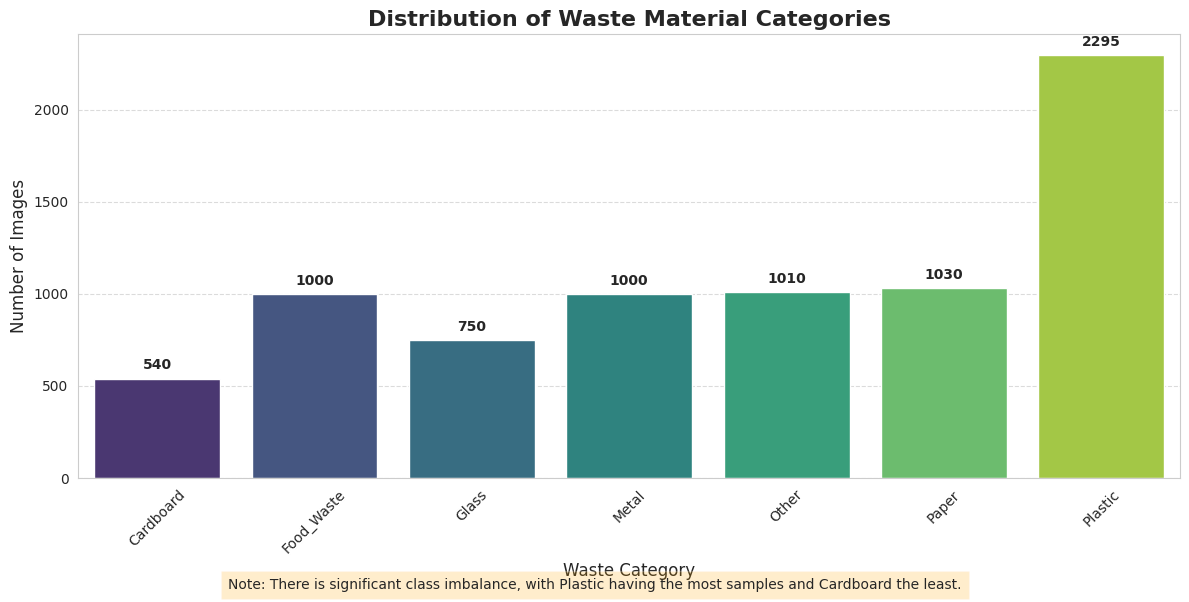

In [17]:
# Visualise Data Distribution

# Create a dictionary of class counts
class_counts = {}
for class_name in class_names:
    class_counts[class_name] = np.sum(labels_array == class_name)

# Set up the figure size and style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Create a color palette
colors = sns.color_palette("viridis", len(class_names))

# Create the bar plot
ax = sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette=colors)

# Add count labels on top of each bar
for i, count in enumerate(class_counts.values()):
    ax.text(i, count + 50, f"{count}", ha='center', fontweight='bold')

# Add labels and title
plt.title('Distribution of Waste Material Categories', fontsize=16, fontweight='bold')
plt.xlabel('Waste Category', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.xticks(rotation=45)

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotations
plt.figtext(0.5, 0.01, 
            "Note: There is significant class imbalance, with Plastic having the most samples and Cardboard the least.",
            ha="center", fontsize=10, bbox={"facecolor":"orange", "alpha":0.2, "pad":5})

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()



#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

In [18]:
# Visualise Sample Images (across different labels)

# Function to display a grid of images
def display_sample_images(images_array, labels_array, class_names, samples_per_class=3):
    """
    Display a grid of sample images for each class
    
    Parameters:
    - images_array: Array of images
    - labels_array: Array of corresponding labels
    - class_names: List of class names
    - samples_per_class: Number of samples to display per class
    """
    # Set up the figure
    fig = plt.figure(figsize=(15, 10))
    plt.suptitle('Sample Images from Each Waste Category', fontsize=16, fontweight='bold')
    
    # Create a grid with rows for each class and columns for samples
    nrows = len(class_names)
    ncols = samples_per_class
    
    # For each class
    for i, class_name in enumerate(class_names):
        # Get indices of images of this class
        indices = np.where(labels_array == class_name)[0]
        
        # Choose random samples (or first few if not enough)
        if len(indices) >= samples_per_class:
            sample_indices = np.random.choice(indices, samples_per_class, replace=False)
        else:
            sample_indices = indices[:samples_per_class]
        
        # Display each sample
        for j, idx in enumerate(sample_indices):
            # Calculate the position in the grid
            pos = i * ncols + j + 1
            
            # Create subplot
            ax = fig.add_subplot(nrows, ncols, pos)
            
            # Display the image
            ax.imshow(images_array[idx])
            
            # Set title for first column only
            if j == 0:
                ax.set_title(f"{class_name}", fontsize=12, fontweight='bold')
            
            # Remove axes for cleaner display
            ax.axis('off')
    
    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(top=0.94)  # Make room for the suptitle
    
    # Show the plot
    plt.show()

# Display sample images
display_sample_images(images_array, labels_array, class_names, samples_per_class=4)



#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

Smallest image dimensions: Height=256, Width=256
Largest image dimensions: Height=256, Width=256
Number of images with dimensions 256x256: 7625 out of 7625
Percentage of images with uniform dimensions: 100.00%


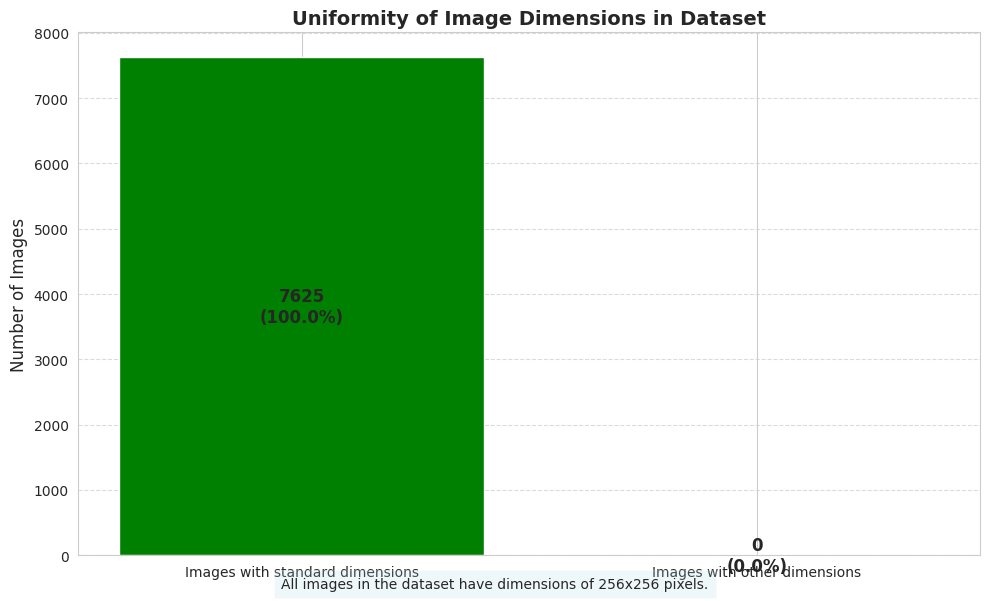

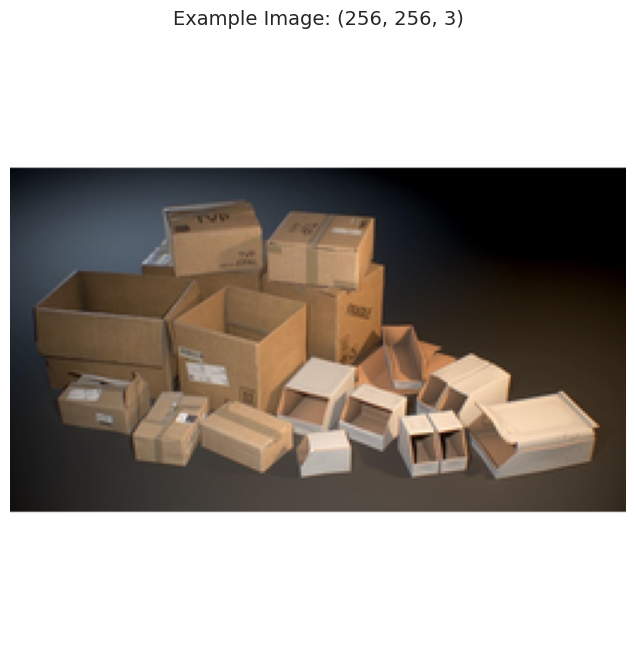

In [19]:
# Find the smallest and largest image dimensions from the data set

# Initialize variables to track min/max dimensions
min_height = float('inf')
min_width = float('inf')
max_height = 0
max_width = 0

# Check each image's dimensions
for img in images_array:
    height, width, _ = img.shape
    
    # Update min dimensions
    min_height = min(min_height, height)
    min_width = min(min_width, width)
    
    # Update max dimensions
    max_height = max(max_height, height)
    max_width = max(max_width, width)

# Display the results
print(f"Smallest image dimensions: Height={min_height}, Width={min_width}")
print(f"Largest image dimensions: Height={max_height}, Width={max_width}")

# Count how many images have these dimensions
same_dim_count = sum(1 for img in images_array if img.shape[0] == min_height and img.shape[1] == min_width)
print(f"Number of images with dimensions {min_height}x{min_width}: {same_dim_count} out of {len(images_array)}")
print(f"Percentage of images with uniform dimensions: {same_dim_count/len(images_array)*100:.2f}%")

# Create a simple visualization to show dimension uniformity
plt.figure(figsize=(10, 6))
plt.bar(['Images with standard dimensions', 'Images with other dimensions'], 
        [same_dim_count, len(images_array) - same_dim_count],
        color=['green', 'red'])
plt.title('Uniformity of Image Dimensions in Dataset', fontsize=14, fontweight='bold')
plt.ylabel('Number of Images', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add count labels
plt.text(0, same_dim_count/2, f"{same_dim_count}\n({same_dim_count/len(images_array)*100:.1f}%)", 
         ha='center', va='center', fontsize=12, fontweight='bold')
plt.text(1, (len(images_array) - same_dim_count)/2, f"{len(images_array) - same_dim_count}\n({(len(images_array) - same_dim_count)/len(images_array)*100:.1f}%)", 
         ha='center', va='center', fontsize=12, fontweight='bold')

plt.figtext(0.5, 0.01, 
            f"All images in the dataset have dimensions of {min_height}x{min_width} pixels.",
            ha="center", fontsize=10, bbox={"facecolor":"lightblue", "alpha":0.2, "pad":5})

plt.tight_layout()
plt.show()

# Also show one example image with its dimensions
plt.figure(figsize=(8, 8))
plt.imshow(images_array[0])
plt.title(f'Example Image: {images_array[0].shape}', fontsize=14)
plt.axis('off')
plt.show()


Current image dimensions: (256, 256, 3)
Target dimensions: 224x224
Resizing images 1-500 of 7625...
Resizing images 501-1000 of 7625...
Resizing images 1001-1500 of 7625...
Resizing images 1501-2000 of 7625...
Resizing images 2001-2500 of 7625...
Resizing images 2501-3000 of 7625...
Resizing images 3001-3500 of 7625...
Resizing images 3501-4000 of 7625...
Resizing images 4001-4500 of 7625...
Resizing images 4501-5000 of 7625...
Resizing images 5001-5500 of 7625...
Resizing images 5501-6000 of 7625...
Resizing images 6001-6500 of 7625...
Resizing images 6501-7000 of 7625...
Resizing images 7001-7500 of 7625...
Resizing images 7501-7625 of 7625...
Resizing completed!


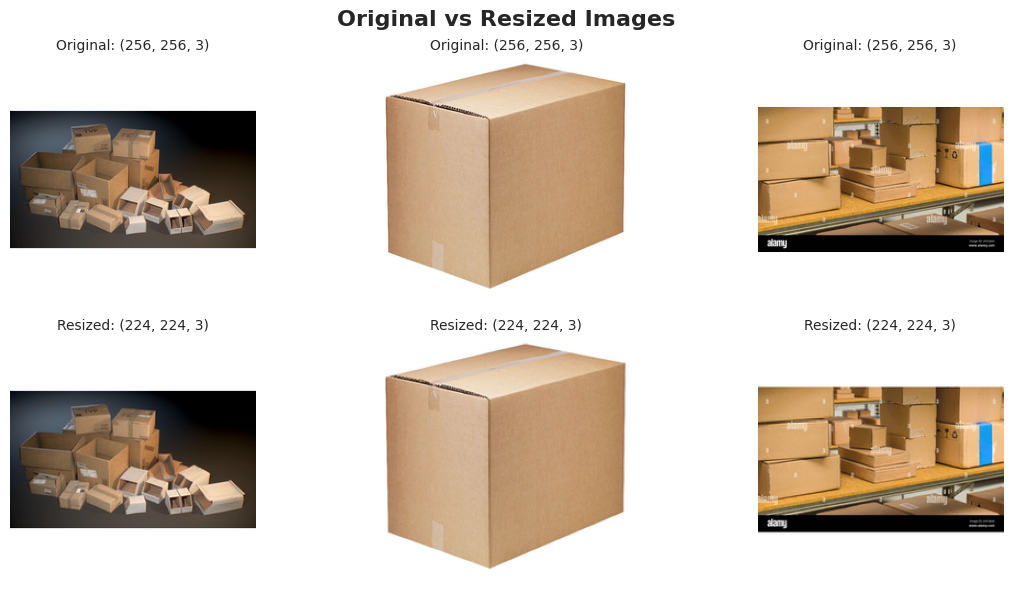

New image array shape: (7625, 224, 224, 3)


In [20]:
# Resize the image dimensions

# Define the target size
# Standard size for many CNN architectures
target_size = (224, 224)

print(f"Current image dimensions: {images_array[0].shape}")
print(f"Target dimensions: {target_size[0]}x{target_size[1]}")

# Initialize array for resized images
resized_images = np.zeros((len(images_array), target_size[0], target_size[1], 3), dtype=np.uint8)

# Process images in batches
batch_size = 500
total_images = len(images_array)

for i in range(0, total_images, batch_size):
    end_idx = min(i + batch_size, total_images)
    print(f"Resizing images {i+1}-{end_idx} of {total_images}...")
    
    # Process each image in the batch
    for j in range(i, end_idx):
        # Convert to PIL for better resizing quality
        img_pil = Image.fromarray(images_array[j])
        # Resize (width, height) in PIL
        img_resized = img_pil.resize((target_size[1], target_size[0]), Image.LANCZOS)
        # Convert back to numpy and store
        resized_images[j] = np.array(img_resized)

print("Resizing completed!")

# Compare original and resized images
plt.figure(figsize=(12, 6))
plt.suptitle('Original vs Resized Images', fontsize=16, fontweight='bold')

for i in range(3):
    # Original image
    plt.subplot(2, 3, i+1)
    plt.imshow(images_array[i])
    plt.title(f"Original: {images_array[0].shape}", fontsize=10)
    plt.axis('off')
    
    # Resized image
    plt.subplot(2, 3, i+4)
    plt.imshow(resized_images[i])
    plt.title(f"Resized: {resized_images[0].shape}", fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Make room for suptitle
plt.show()

# Replace original images with resized ones
images_array = resized_images

print(f"New image array shape: {images_array.shape}")


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

Label Encoding Mapping:
  Cardboard -> 0
  Food_Waste -> 1
  Glass -> 2
  Metal -> 3
  Other -> 4
  Paper -> 5
  Plastic -> 6

Original vs Encoded Labels (first 5 examples):
  Original: Cardboard, Numeric: 0, One-Hot: [1. 0. 0. 0. 0. 0. 0.]
  Original: Cardboard, Numeric: 0, One-Hot: [1. 0. 0. 0. 0. 0. 0.]
  Original: Cardboard, Numeric: 0, One-Hot: [1. 0. 0. 0. 0. 0. 0.]
  Original: Cardboard, Numeric: 0, One-Hot: [1. 0. 0. 0. 0. 0. 0.]
  Original: Cardboard, Numeric: 0, One-Hot: [1. 0. 0. 0. 0. 0. 0.]

One-hot encoded shape: (7625, 7) (samples × classes)

Class distribution after encoding:
  Class 0 (Cardboard): 540 images (7.1%)
  Class 1 (Food_Waste): 1000 images (13.1%)
  Class 2 (Glass): 750 images (9.8%)
  Class 3 (Metal): 1000 images (13.1%)
  Class 4 (Other): 1010 images (13.2%)
  Class 5 (Paper): 1030 images (13.5%)
  Class 6 (Plastic): 2295 images (30.1%)


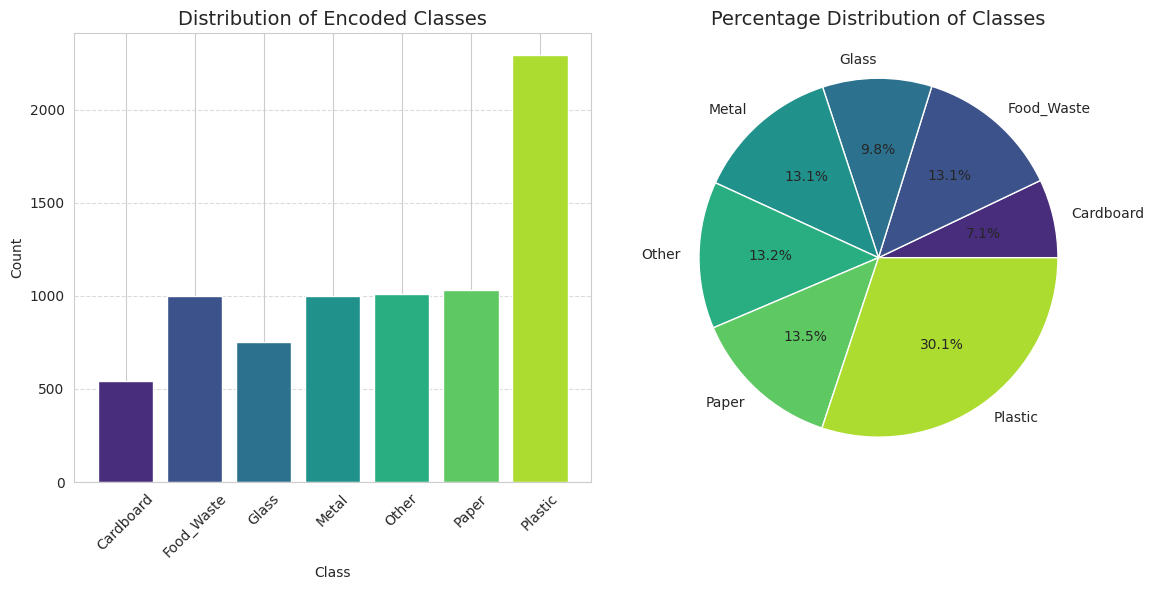

In [21]:
# Encode the labels suitably

# Encode the labels suitably

# Import LabelEncoder 
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
label_encoder = LabelEncoder()

# Fit and transform the labels
encoded_labels = label_encoder.fit_transform(labels_array)

# Display the encoding mapping
print("Label Encoding Mapping:")
for i, class_name in enumerate(label_encoder.classes_):
    print(f"  {class_name} -> {label_encoder.transform([class_name])[0]}")

# Convert to one-hot encoding for multi-class classification
one_hot_labels = tf.keras.utils.to_categorical(encoded_labels)

# Display the first few examples
print("\nOriginal vs Encoded Labels (first 5 examples):")
for i in range(5):
    print(f"  Original: {labels_array[i]}, Numeric: {encoded_labels[i]}, One-Hot: {one_hot_labels[i]}")

# Verify one-hot encoding shape
print(f"\nOne-hot encoded shape: {one_hot_labels.shape} (samples × classes)")

# Check class distribution in encoded form
print("\nClass distribution after encoding:")
for i in range(len(label_encoder.classes_)):
    count = np.sum(encoded_labels == i)
    percentage = count / len(encoded_labels) * 100
    print(f"  Class {i} ({label_encoder.classes_[i]}): {count} images ({percentage:.1f}%)")

# Visualize encoding - using bar chart instead of histogram for better control
plt.figure(figsize=(12, 6))

# Bar chart for class distribution
plt.subplot(1, 2, 1)
class_counts = [np.sum(encoded_labels == i) for i in range(len(label_encoder.classes_))]
plt.bar(range(len(label_encoder.classes_)), class_counts, 
       color=sns.color_palette("viridis", len(label_encoder.classes_)))
plt.xticks(range(len(label_encoder.classes_)), label_encoder.classes_, rotation=45)
plt.title('Distribution of Encoded Classes', fontsize=14)
plt.xlabel('Class')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Pie chart for percentage distribution
plt.subplot(1, 2, 2)
plt.pie(class_counts,
        labels=[f"{label_encoder.classes_[i]}" for i in range(len(label_encoder.classes_))],
        autopct='%1.1f%%',
        colors=sns.color_palette("viridis", len(label_encoder.classes_)))
plt.title('Percentage Distribution of Classes', fontsize=14)

plt.tight_layout()
plt.show()



### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

Total number of images: 7625
Training set size: 6100 images (80%)
Validation set size: 1525 images (20%)

Data shapes:
X_train: (6100, 224, 224, 3)
y_train: (6100, 7)
X_val: (1525, 224, 224, 3)
y_val: (1525, 7)

Class distribution in training set:
  Class 0 (Cardboard): 432 images (7.1%)
  Class 1 (Food_Waste): 800 images (13.1%)
  Class 2 (Glass): 600 images (9.8%)
  Class 3 (Metal): 800 images (13.1%)
  Class 4 (Other): 808 images (13.2%)
  Class 5 (Paper): 824 images (13.5%)
  Class 6 (Plastic): 1836 images (30.1%)

Class distribution in validation set:
  Class 0 (Cardboard): 108 images (7.1%)
  Class 1 (Food_Waste): 200 images (13.1%)
  Class 2 (Glass): 150 images (9.8%)
  Class 3 (Metal): 200 images (13.1%)
  Class 4 (Other): 202 images (13.2%)
  Class 5 (Paper): 206 images (13.5%)
  Class 6 (Plastic): 459 images (30.1%)


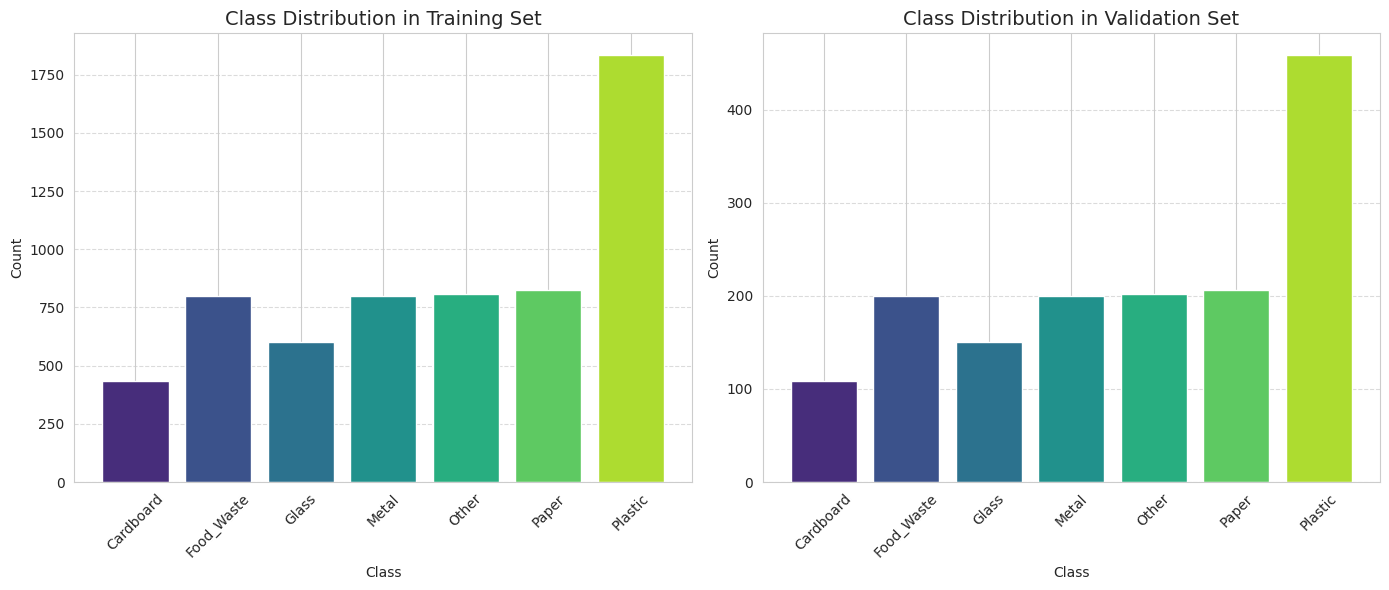


Pixel value range:
X_train min: 0.0, max: 1.0
X_val min: 0.0, max: 1.0


In [22]:
# Assign specified parts of the dataset to train and validation sets

from sklearn.model_selection import train_test_split

# Set the validation size
validation_size = 0.2

# Set random seed for reproducibility
random_seed = 42

# Perform stratified split to maintain class distribution
X_train, X_val, y_train, y_val = train_test_split(
    images_array,                  # Images
    one_hot_labels,                # One-hot encoded labels
    test_size=validation_size,     # Percentage for validation
    random_state=random_seed,      # For reproducibility
    stratify=encoded_labels        # Maintain class distribution
)

# Display the results
print(f"Total number of images: {len(images_array)}")
print(f"Training set size: {X_train.shape[0]} images ({(1-validation_size)*100:.0f}%)")
print(f"Validation set size: {X_val.shape[0]} images ({validation_size*100:.0f}%)")

# Check that the shapes are correct
print("\nData shapes:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_val: {X_val.shape}")
print(f"y_val: {y_val.shape}")

# Verify class distribution in both splits
print("\nClass distribution in training set:")
train_labels_numeric = np.argmax(y_train, axis=1)
for i in range(len(label_encoder.classes_)):
    count = np.sum(train_labels_numeric == i)
    percentage = count / len(train_labels_numeric) * 100
    print(f"  Class {i} ({label_encoder.classes_[i]}): {count} images ({percentage:.1f}%)")

print("\nClass distribution in validation set:")
val_labels_numeric = np.argmax(y_val, axis=1)
for i in range(len(label_encoder.classes_)):
    count = np.sum(val_labels_numeric == i)
    percentage = count / len(val_labels_numeric) * 100
    print(f"  Class {i} ({label_encoder.classes_[i]}): {count} images ({percentage:.1f}%)")

# Visualize the split
plt.figure(figsize=(14, 6))

# Training distribution
plt.subplot(1, 2, 1)
train_counts = [np.sum(train_labels_numeric == i) for i in range(len(label_encoder.classes_))]
plt.bar(range(len(label_encoder.classes_)), train_counts,
        color=sns.color_palette("viridis", len(label_encoder.classes_)))
plt.title('Class Distribution in Training Set', fontsize=14)
plt.xticks(range(len(label_encoder.classes_)), label_encoder.classes_, rotation=45)
plt.xlabel('Class')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Validation distribution
plt.subplot(1, 2, 2)
val_counts = [np.sum(val_labels_numeric == i) for i in range(len(label_encoder.classes_))]
plt.bar(range(len(label_encoder.classes_)), val_counts,
        color=sns.color_palette("viridis", len(label_encoder.classes_)))
plt.title('Class Distribution in Validation Set', fontsize=14)
plt.xticks(range(len(label_encoder.classes_)), label_encoder.classes_, rotation=45)
plt.xlabel('Class')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Normalize the pixel values to [0,1] (important for model training)
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0

print("\nPixel value range:")
print(f"X_train min: {X_train.min()}, max: {X_train.max()}")
print(f"X_val min: {X_val.min()}, max: {X_val.max()}")


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [23]:
# Build and compile the model

# Set random seeds for reproducibility
import random
import os
import numpy as np
import tensorflow as tf

seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
os.environ['PYTHONHASHSEED'] = str(seed_value)

# Define CNN model for waste classification
def build_waste_classification_model(input_shape, num_classes):
    """
    Build a CNN model focused on achieving higher accuracy for waste classification
    """
    model = models.Sequential()
    
    # First convolutional block
    model.add(layers.Conv2D(64, (3, 3), padding='same', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))
    
    # Second convolutional block
    model.add(layers.Conv2D(128, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.3))
    
    # Third convolutional block
    model.add(layers.Conv2D(256, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.4))
    
    # Flatten layer
    model.add(layers.Flatten())
    
    # Fully connected layers
    model.add(layers.Dense(512))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(0.5))
    
    # Output layer
    model.add(layers.Dense(num_classes, activation='softmax'))
    
    # Compile model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Define input shape and number of classes
input_shape = X_train.shape[1:]  # (224, 224, 3)
num_classes = y_train.shape[1]   # 7 classes

# Create model
model = build_waste_classification_model(input_shape, num_classes)

# Print model summary
model.summary()

# Calculate class weights to handle imbalance
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(np.argmax(y_train, axis=1)),
    y=np.argmax(y_train, axis=1)
)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}
print("\nClass weights to handle imbalance:")
for class_idx, weight in class_weight_dict.items():
    print(f"  Class {class_idx} ({label_encoder.classes_[class_idx]}): {weight:.4f}")


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 224, 224, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 224, 224, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 112, 112, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 112, 112, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 56, 56, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 56, 56, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │   102,760,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,139,207 (393.44 MB)

 Trainable params: 103,137,287 (393.44 MB)

 Non-trainable params: 1,920 (7.50 KB)


Class weights to handle imbalance:
  Class 0 (Cardboard): 2.0172
  Class 1 (Food_Waste): 1.0893
  Class 2 (Glass): 1.4524
  Class 3 (Metal): 1.0893
  Class 4 (Other): 1.0785
  Class 5 (Paper): 1.0576
  Class 6 (Plastic): 0.4746


#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

Epoch 1/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2860 - loss: 2.0530
Epoch 1: val_accuracy improved from -inf to 0.17311, saving model to best_waste_classification_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 371s 2s/step - accuracy: 0.2861 - loss: 2.0521 - val_accuracy: 0.1731 - val_loss: 2.2062 - learning_rate: 0.0010
Epoch 2/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4318 - loss: 1.5115
Epoch 2: val_accuracy did not improve from 0.17311
191/191 ━━━━━━━━━━━━━━━━━━━━ 353s 2s/step - accuracy: 0.4319 - loss: 1.5114 - val_accuracy: 0.1633 - val_loss: 2.2660 - learning_rate: 0.0010
Epoch 3/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5102 - loss: 1.2723
Epoch 3: val_accuracy improved from 0.17311 to 0.32656, saving model to best_waste_classification_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 390s 2s/step - accuracy: 0.5103 - loss: 1.2721 - val_accuracy: 0.3266 - val_loss: 1.9478 - learning_rate: 0.0010
Epoch 4/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5933 - loss: 1.0611
Epoch 4: val_accuracy did not improve from 0.32656
191/191 ━━━━━━━━━━━━━━━━━━━━ 355s 2s/step - accuracy: 0.5934 - loss: 1.0610 - val_accuracy: 0.2164 - val_loss: 2.9217 - learning_rate: 0.0010
Epoch 5/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6612 - loss: 0.8780
Epoch 5: val_accuracy improved from 0.32656 to 0.49115, saving model to best_waste_classification_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 357s 2s/step - accuracy: 0.6613 - loss: 0.8777 - val_accuracy: 0.4911 - val_loss: 1.4197 - learning_rate: 0.0010
Epoch 6/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7401 - loss: 0.6816
Epoch 6: val_accuracy did not improve from 0.49115
191/191 ━━━━━━━━━━━━━━━━━━━━ 350s 2s/step - accuracy: 0.7402 - loss: 0.6814 - val_accuracy: 0.3987 - val_loss: 1.8995 - learning_rate: 0.0010
Epoch 7/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8067 - loss: 0.5100
Epoch 7: val_accuracy did not improve from 0.49115
191/191 ━━━━━━━━━━━━━━━━━━━━ 350s 2s/step - accuracy: 0.8068 - loss: 0.5098 - val_accuracy: 0.2866 - val_loss: 3.0638 - learning_rate: 0.0010
Epoch 8/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8563 - loss: 0.3793
Epoch 8: val_accuracy did not improve from 0.49115
191/191 ━━━━━━━━━━━━━━━━━━━━ 353s 2s/step - accuracy: 0.8563 - loss: 0.3792 - val_accuracy: 0.2787 - val_loss: 2.9678 - learning_rate: 0.0010
Epoch 9/30
191/191 ━━━━━

191/191 ━━━━━━━━━━━━━━━━━━━━ 361s 2s/step - accuracy: 0.9377 - loss: 0.1761 - val_accuracy: 0.6728 - val_loss: 1.1170 - learning_rate: 2.0000e-04
Epoch 12/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9548 - loss: 0.1187
Epoch 12: val_accuracy improved from 0.67279 to 0.68000, saving model to best_waste_classification_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 363s 2s/step - accuracy: 0.9548 - loss: 0.1187 - val_accuracy: 0.6800 - val_loss: 1.1069 - learning_rate: 2.0000e-04
Epoch 13/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9678 - loss: 0.0982
Epoch 13: val_accuracy did not improve from 0.68000
191/191 ━━━━━━━━━━━━━━━━━━━━ 353s 2s/step - accuracy: 0.9678 - loss: 0.0981 - val_accuracy: 0.6721 - val_loss: 1.1545 - learning_rate: 2.0000e-04
Epoch 14/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9814 - loss: 0.0698
Epoch 14: val_accuracy improved from 0.68000 to 0.68197, saving model to best_waste_classification_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 361s 2s/step - accuracy: 0.9814 - loss: 0.0698 - val_accuracy: 0.6820 - val_loss: 1.1549 - learning_rate: 2.0000e-04
Epoch 15/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9806 - loss: 0.0650
Epoch 15: val_accuracy did not improve from 0.68197
191/191 ━━━━━━━━━━━━━━━━━━━━ 355s 2s/step - accuracy: 0.9806 - loss: 0.0650 - val_accuracy: 0.6754 - val_loss: 1.2173 - learning_rate: 2.0000e-04
Epoch 16/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9784 - loss: 0.0594
Epoch 16: val_accuracy did not improve from 0.68197
191/191 ━━━━━━━━━━━━━━━━━━━━ 353s 2s/step - accuracy: 0.9784 - loss: 0.0594 - val_accuracy: 0.6675 - val_loss: 1.2158 - learning_rate: 2.0000e-04
Epoch 17/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9868 - loss: 0.0469
Epoch 17: val_accuracy did not improve from 0.68197
191/191 ━━━━━━━━━━━━━━━━━━━━ 353s 2s/step - accuracy: 0.9868 - loss: 0.0469 - val_accuracy: 0.6636 - val_loss: 1.2694 - learning_rate: 2.0000e-04
Ep

191/191 ━━━━━━━━━━━━━━━━━━━━ 359s 2s/step - accuracy: 0.9952 - loss: 0.0268 - val_accuracy: 0.6859 - val_loss: 1.2336 - learning_rate: 4.0000e-05
Epoch 23/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9944 - loss: 0.0256
Epoch 23: val_accuracy did not improve from 0.68590
191/191 ━━━━━━━━━━━━━━━━━━━━ 352s 2s/step - accuracy: 0.9944 - loss: 0.0256 - val_accuracy: 0.6839 - val_loss: 1.2585 - learning_rate: 4.0000e-05
Epoch 24/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9969 - loss: 0.0230
Epoch 24: val_accuracy did not improve from 0.68590
191/191 ━━━━━━━━━━━━━━━━━━━━ 352s 2s/step - accuracy: 0.9968 - loss: 0.0230 - val_accuracy: 0.6793 - val_loss: 1.2535 - learning_rate: 4.0000e-05
Epoch 25/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9949 - loss: 0.0221
Epoch 25: val_accuracy did not improve from 0.68590
191/191 ━━━━━━━━━━━━━━━━━━━━ 351s 2s/step - accuracy: 0.9949 - loss: 0.0221 - val_accuracy: 0.6839 - val_loss: 1.2517 - learning_rate: 4.0000e-05
Ep

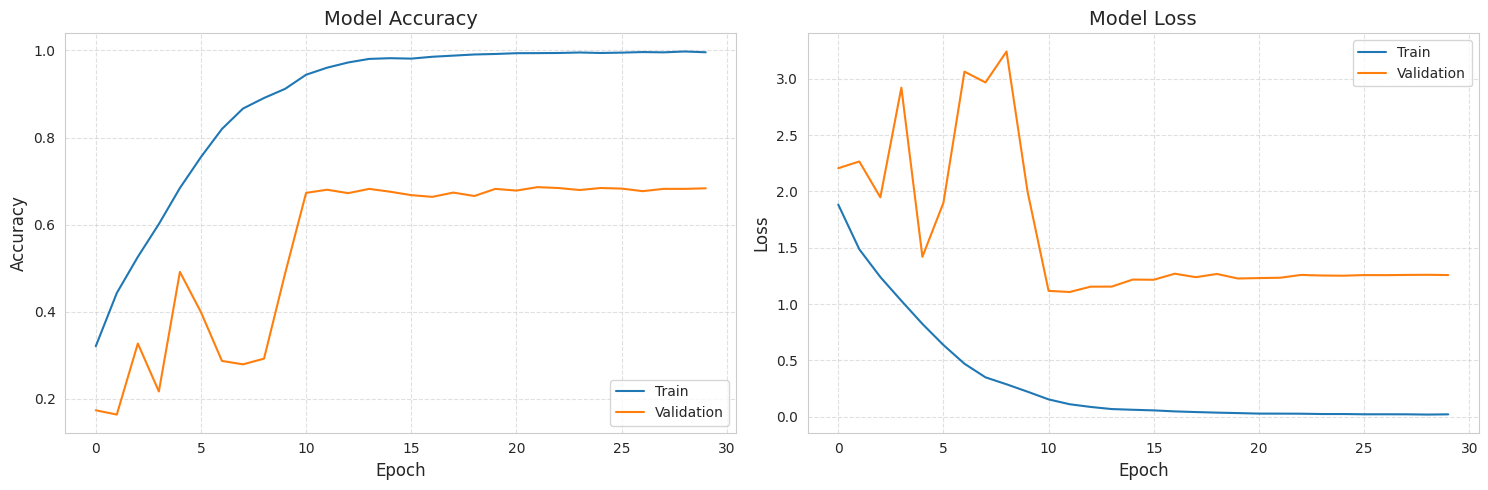


Best validation accuracy: 0.6859 (epoch 22)
Final training accuracy: 0.9959
Final validation accuracy: 0.6833


In [24]:
# Training

# Define callbacks for model training
callbacks = [
    # Early stopping to prevent overfitting
    tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True,
        verbose=1
    ),
    
    # Reduce learning rate when a metric has stopped improving
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_accuracy',
        factor=0.2,
        patience=5,
        min_lr=1e-6,
        verbose=1
    ),
    
    # Save the best model
    tf.keras.callbacks.ModelCheckpoint(
        filepath='best_waste_classification_model.h5',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
]

# Define training parameters
batch_size = 32
epochs = 30

# Train the model
history = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val, y_val),
    callbacks=callbacks,
    class_weight=class_weight_dict,  # Use class weights to handle imbalance
    verbose=1
)

# Plot training history
plt.figure(figsize=(15, 5))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss', fontsize=14)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Get the epoch with the best validation accuracy
best_epoch = np.argmax(history.history['val_accuracy']) + 1
best_val_acc = np.max(history.history['val_accuracy'])
print(f"\nBest validation accuracy: {best_val_acc:.4f} (epoch {best_epoch})")

# Print final training and validation accuracy
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
print(f"Final training accuracy: {final_train_acc:.4f}")
print(f"Final validation accuracy: {final_val_acc:.4f}")


### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

48/48 ━━━━━━━━━━━━━━━━━━━━ 15s 320ms/step - accuracy: 0.6635 - loss: 1.2661

Test accuracy: 0.6859
Test loss: 1.2336
48/48 ━━━━━━━━━━━━━━━━━━━━ 16s 326ms/step

Overall Metrics:
Accuracy: 0.6859
Macro-average Precision: 0.6903
Macro-average Recall: 0.6809
Macro-average F1-score: 0.6818
Weighted Precision: 0.6892
Weighted Recall: 0.6859
Weighted F1-score: 0.6840


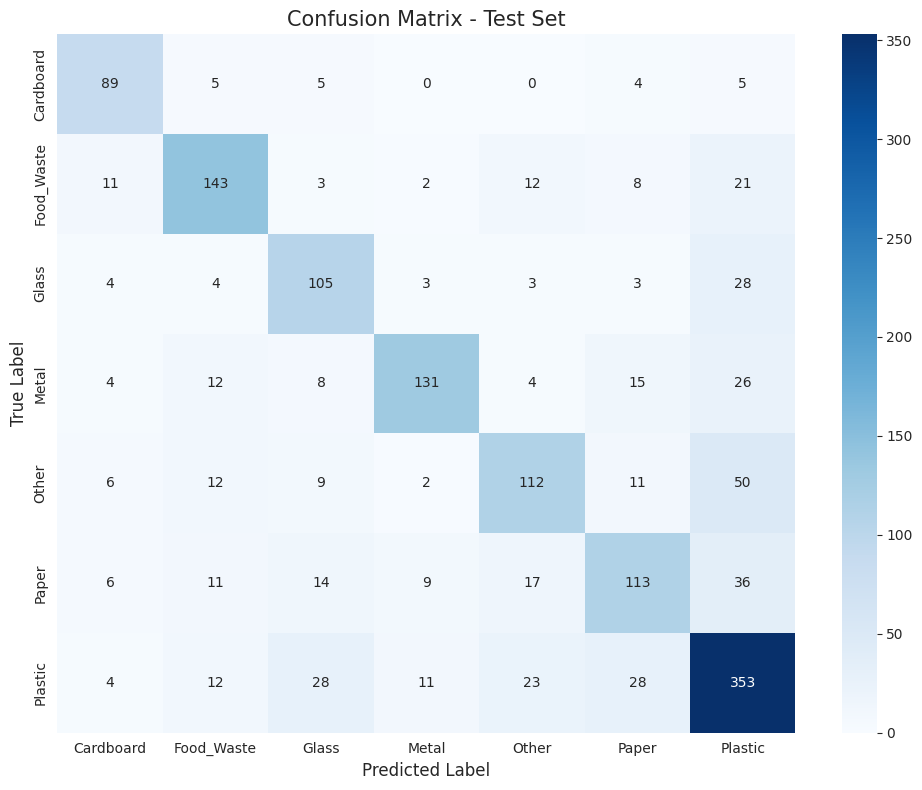


Classification Report:
              precision    recall  f1-score   support

   Cardboard       0.72      0.82      0.77       108
  Food_Waste       0.72      0.71      0.72       200
       Glass       0.61      0.70      0.65       150
       Metal       0.83      0.66      0.73       200
       Other       0.65      0.55      0.60       202
       Paper       0.62      0.55      0.58       206
     Plastic       0.68      0.77      0.72       459

    accuracy                           0.69      1525
   macro avg       0.69      0.68      0.68      1525
weighted avg       0.69      0.69      0.68      1525



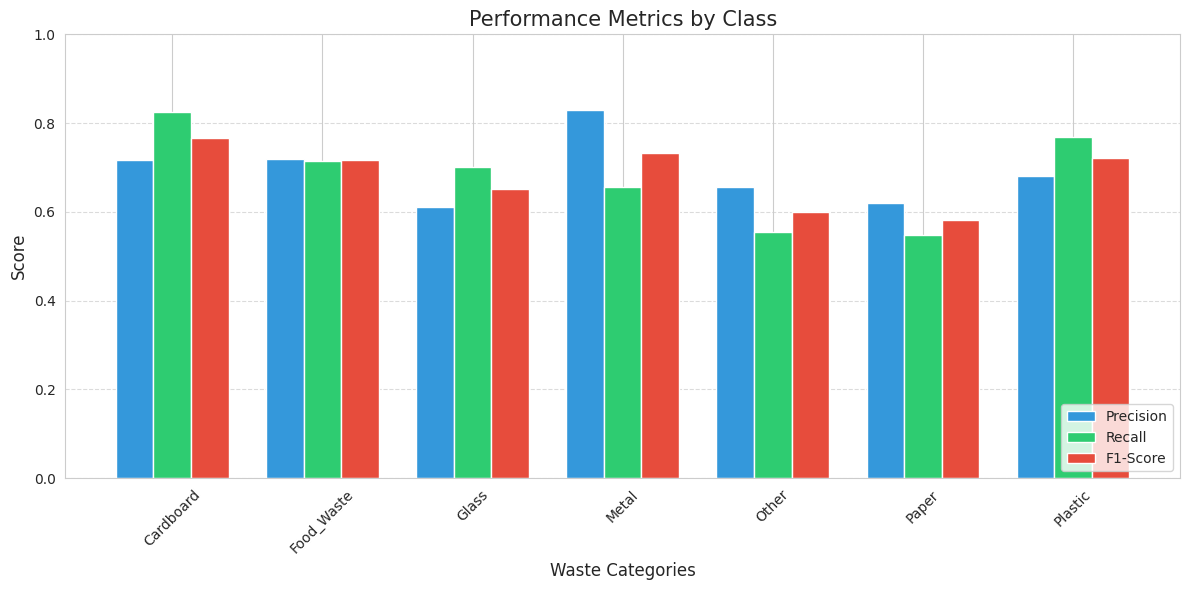

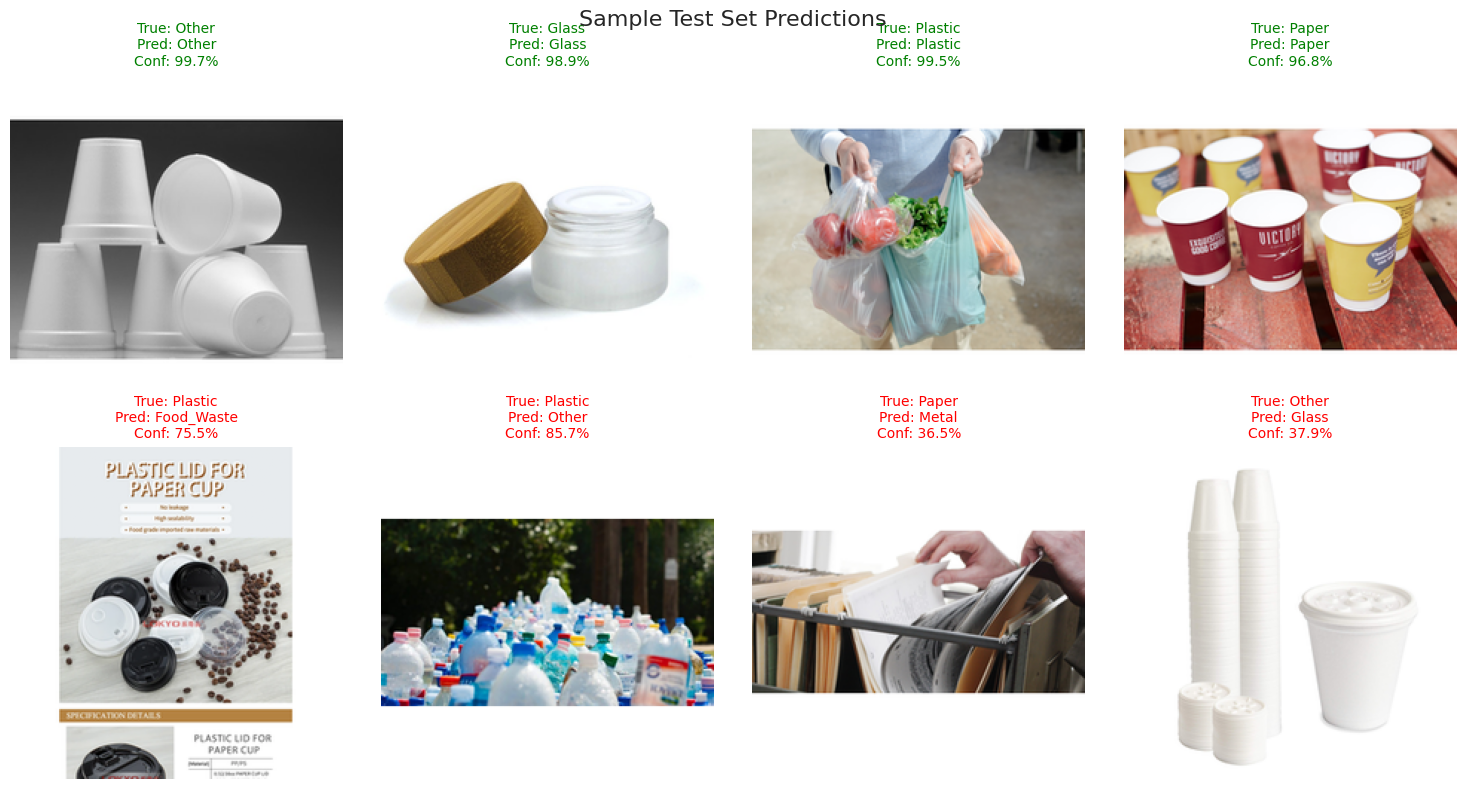

In [25]:
# Evaluate on the test set; display suitable metrics

# Evaluate model on validation (test) set
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=1)
print(f"\nTest accuracy: {val_acc:.4f}")
print(f"Test loss: {val_loss:.4f}")

# Get predictions
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Calculate overall metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision_macro = precision_score(y_true_classes, y_pred_classes, average='macro')
recall_macro = recall_score(y_true_classes, y_pred_classes, average='macro')
f1_macro = f1_score(y_true_classes, y_pred_classes, average='macro')
precision_weighted = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall_weighted = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1_weighted = f1_score(y_true_classes, y_pred_classes, average='weighted')

print("\nOverall Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Macro-average Precision: {precision_macro:.4f}")
print(f"Macro-average Recall: {recall_macro:.4f}")
print(f"Macro-average F1-score: {f1_macro:.4f}")
print(f"Weighted Precision: {precision_weighted:.4f}")
print(f"Weighted Recall: {recall_weighted:.4f}")
print(f"Weighted F1-score: {f1_weighted:.4f}")

# Confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=label_encoder.classes_,
           yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Test Set', fontsize=15)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

# Classification report
cr = classification_report(y_true_classes, y_pred_classes, 
                          target_names=label_encoder.classes_,
                          zero_division=0)
print("\nClassification Report:")
print(cr)

# Per-class metrics visualization
precision_per_class = precision_score(y_true_classes, y_pred_classes, average=None)
recall_per_class = recall_score(y_true_classes, y_pred_classes, average=None)
f1_per_class = f1_score(y_true_classes, y_pred_classes, average=None)

plt.figure(figsize=(12, 6))
x = np.arange(len(label_encoder.classes_))
width = 0.25

plt.bar(x - width, precision_per_class, width, label='Precision', color='#3498db')
plt.bar(x, recall_per_class, width, label='Recall', color='#2ecc71')
plt.bar(x + width, f1_per_class, width, label='F1-Score', color='#e74c3c')

plt.xlabel('Waste Categories', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Performance Metrics by Class', fontsize=15)
plt.xticks(x, label_encoder.classes_, rotation=45)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 1.0)

plt.tight_layout()
plt.show()

# Display sample predictions
plt.figure(figsize=(15, 8))
plt.suptitle('Sample Test Set Predictions', fontsize=16)

# Get indices of correct and incorrect predictions
correct_indices = np.where(y_true_classes == y_pred_classes)[0]
incorrect_indices = np.where(y_true_classes != y_pred_classes)[0]

# Show a few examples
for i in range(4):
    # Show a correct prediction (if available)
    if i < len(correct_indices):
        plt.subplot(2, 4, i+1)
        idx = correct_indices[i]
        img = X_val[idx]
        true_label = label_encoder.classes_[y_true_classes[idx]]
        pred_label = label_encoder.classes_[y_pred_classes[idx]]
        confidence = y_pred[idx][y_pred_classes[idx]] * 100
        
        plt.imshow(img)
        plt.title(f"True: {true_label}\nPred: {pred_label}\nConf: {confidence:.1f}%", 
                color='green', fontsize=10)
        plt.axis('off')
    
    # Show an incorrect prediction (if available)
    if i < len(incorrect_indices):
        plt.subplot(2, 4, i+5)
        idx = incorrect_indices[i]
        img = X_val[idx]
        true_label = label_encoder.classes_[y_true_classes[idx]]
        pred_label = label_encoder.classes_[y_pred_classes[idx]]
        confidence = y_pred[idx][y_pred_classes[idx]] * 100
        
        plt.imshow(img)
        plt.title(f"True: {true_label}\nPred: {pred_label}\nConf: {confidence:.1f}%", 
                color='red', fontsize=10)
        plt.axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

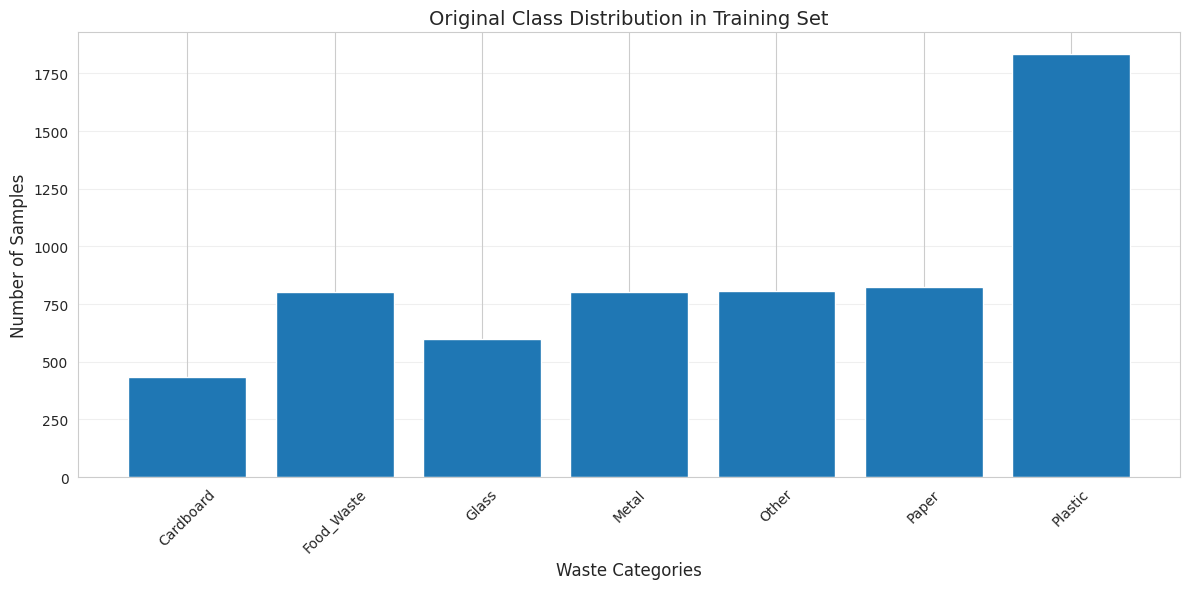

Class distribution before augmentation:
  Cardboard: 432 images
  Food_Waste: 800 images
  Glass: 600 images
  Metal: 800 images
  Other: 808 images
  Paper: 824 images
  Plastic: 1836 images

Showing augmentation examples:

Augmentation examples for: Cardboard


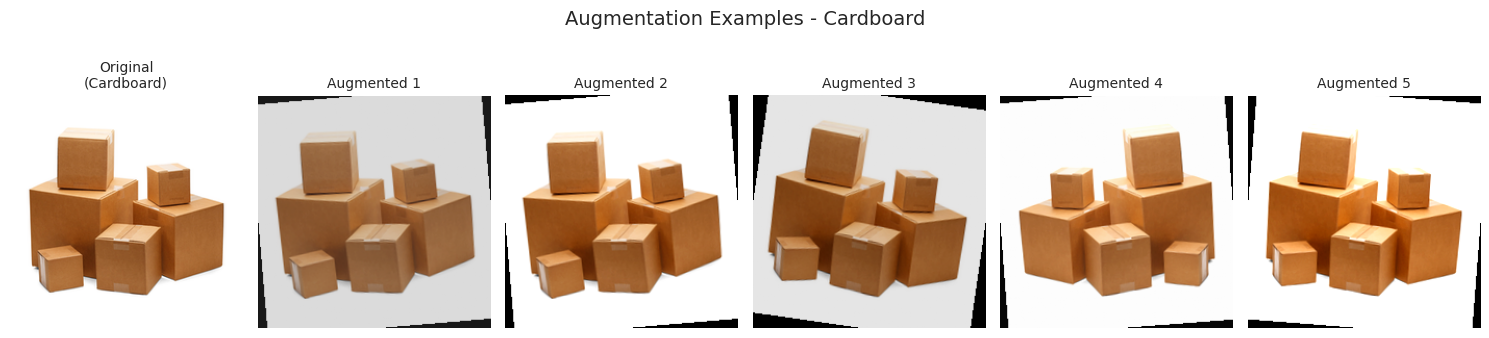


Augmentation examples for: Food_Waste


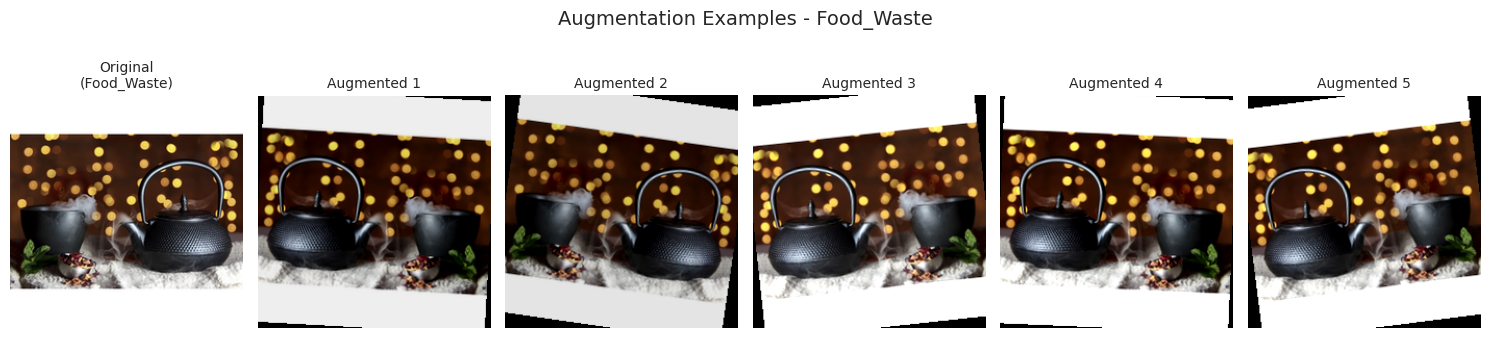


Augmentation examples for: Glass


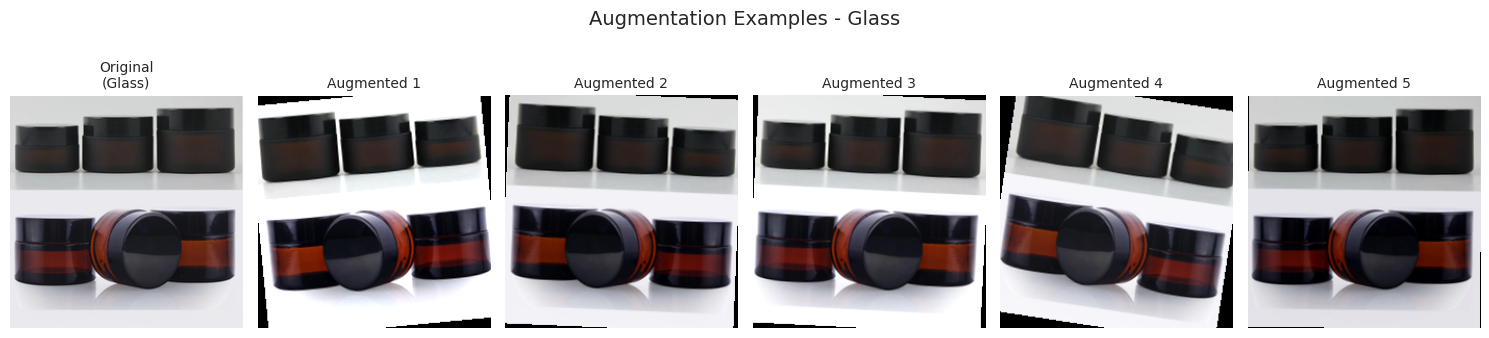


(Showing only first 3 classes for brevity. Remove the break to see all.)


In [34]:
# Define augmentation steps to augment images

# Import necessary libraries
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

# First, visualize original class distribution
class_counts = np.bincount(np.argmax(y_train, axis=1))
plt.figure(figsize=(12, 6))
plt.bar(label_encoder.classes_, class_counts)
plt.title("Original Class Distribution in Training Set", fontsize=14)
plt.xlabel("Waste Categories", fontsize=12)
plt.ylabel("Number of Samples", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("Class distribution before augmentation:")
for i, class_name in enumerate(label_encoder.classes_):
    print(f"  {class_name}: {int(class_counts[i])} images")

def apply_augmentation(img_array):
    """
    Apply basic augmentations to an image using PIL
    
    Parameters:
    - img_array: numpy array of image (can be float 0-1 or uint8)
    
    Returns:
    - Augmented image as numpy array (same type as input)
    """
    # Check if we need to convert from float to uint8
    is_float = img_array.dtype == np.float32 or img_array.dtype == np.float64
    
    if is_float:
        # Convert from 0-1 float to 0-255 uint8
        img_array_uint8 = (img_array * 255).astype(np.uint8)
    else:
        img_array_uint8 = img_array
    
    # Convert numpy array to PIL Image
    img = Image.fromarray(img_array_uint8)
    
    # Apply a random horizontal flip with 50% probability
    if random.random() > 0.5:
        img = img.transpose(Image.FLIP_LEFT_RIGHT)
    
    # Apply a small random rotation (between -10 and 10 degrees)
    rotation_angle = random.uniform(-10, 10)
    img = img.rotate(rotation_angle, resample=Image.BILINEAR, expand=False)
    
    # Random brightness adjustment (0.8 to 1.2)
    brightness_factor = random.uniform(0.8, 1.2)
    enhancer = ImageEnhance.Brightness(img)
    img = enhancer.enhance(brightness_factor)
    
    # Random contrast adjustment (0.8 to 1.2)
    contrast_factor = random.uniform(0.8, 1.2)
    enhancer = ImageEnhance.Contrast(img)
    img = enhancer.enhance(contrast_factor)
    
    # Convert back to numpy array
    augmented_uint8 = np.array(img)
    
    # If input was float, convert back to float
    if is_float:
        return augmented_uint8.astype(np.float32) / 255.0
    else:
        return augmented_uint8

def show_augmentation_examples(image, class_name, num_examples=5):
    """
    Show original image alongside augmented versions
    """
    plt.figure(figsize=(15, 4))
    
    # Show original image
    plt.subplot(1, num_examples+1, 1)
    plt.imshow(image)
    plt.title(f"Original\n({class_name})", fontsize=10)
    plt.axis('off')
    
    # Show augmented versions
    for i in range(num_examples):
        # Apply augmentation
        augmented = apply_augmentation(image)
        
        # Display
        plt.subplot(1, num_examples+1, i+2)
        plt.imshow(augmented)
        plt.title(f"Augmented {i+1}", fontsize=10)
        plt.axis('off')
    
    plt.tight_layout()
    plt.suptitle(f"Augmentation Examples - {class_name}", fontsize=14, y=0.95)
    plt.subplots_adjust(top=0.85)
    plt.show()

# Show augmentation examples for each class
print("\nShowing augmentation examples:")
for class_idx, class_name in enumerate(label_encoder.classes_):
    # Find images of this class
    indices = np.where(np.argmax(y_train, axis=1) == class_idx)[0]
    if len(indices) > 0:
        # Select a random image
        sample_idx = indices[random.randint(0, len(indices)-1)]
        sample_image = X_train[sample_idx]
        
        print(f"\nAugmentation examples for: {class_name}")
        show_augmentation_examples(sample_image, class_name)
        
        # Only show first 3 classes to save space
        if class_idx >= 2:
            print("\n(Showing only first 3 classes for brevity. Remove the break to see all.)")
            break


Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [35]:
# Create a function to augment the images

def create_augmented_images(X_class, y_class, num_augmentations):
    """
    Create augmented versions of images from a single class
    
    Parameters:
    - X_class: Images from a single class
    - y_class: Corresponding one-hot encoded labels
    - num_augmentations: Number of augmented images to create
    
    Returns:
    - X_augmented, y_augmented: Augmented images and their labels
    """
    # Initialize arrays for augmented data
    X_augmented = []
    y_augmented = []
    
    # If we need fewer augmentations than images, randomly select images
    if num_augmentations <= len(X_class):
        indices = np.random.choice(len(X_class), num_augmentations, replace=False)
        for idx in indices:
            # Apply augmentation
            augmented_img = apply_augmentation(X_class[idx])
            X_augmented.append(augmented_img)
            y_augmented.append(y_class[idx])
    else:
        # If we need more augmentations than images, we'll repeat some
        # Calculate how many times we need to augment each image on average
        repeats = num_augmentations // len(X_class) + 1
        
        # Create augmentations
        count = 0
        for _ in range(repeats):
            for idx in range(len(X_class)):
                if count >= num_augmentations:
                    break
                # Apply augmentation
                augmented_img = apply_augmentation(X_class[idx])
                X_augmented.append(augmented_img)
                y_augmented.append(y_class[idx])
                count += 1
    
    return np.array(X_augmented), np.array(y_augmented)

def balance_dataset_with_augmentation(X_data, y_data, target_per_class=None):
    """
    Balance the dataset by augmenting underrepresented classes
    
    Parameters:
    - X_data: Image data
    - y_data: One-hot encoded labels
    - target_per_class: Target number of samples per class
    
    Returns:
    - X_balanced, y_balanced: Balanced dataset
    """
    # Convert one-hot to class indices
    y_indices = np.argmax(y_data, axis=1)
    
    # Count samples per class
    unique_classes = np.unique(y_indices)
    class_counts = {c: np.sum(y_indices == c) for c in unique_classes}
    
    # If no target specified, use max class size
    if target_per_class is None:
        target_per_class = max(class_counts.values())
    
    print(f"Target samples per class: {target_per_class}")
    
    # Lists for balanced dataset
    X_balanced = list(X_data)  # Start with all original data
    y_balanced = list(y_data)
    
    # For each class that needs augmentation
    for class_idx in unique_classes:
        current_count = class_counts[class_idx]
        
        # Skip if we already have enough samples
        if current_count >= target_per_class:
            print(f"Class {label_encoder.classes_[class_idx]}: {current_count} samples (no augmentation needed)")
            continue
        
        # Calculate how many augmented samples needed
        needed = target_per_class - current_count
        print(f"Class {label_encoder.classes_[class_idx]}: {current_count} original + {needed} augmented")
        
        # Get images of this class
        class_indices = np.where(y_indices == class_idx)[0]
        X_class = X_data[class_indices]
        y_class = y_data[class_indices]
        
        # Create augmented samples
        X_aug, y_aug = create_augmented_images(X_class, y_class, needed)
        
        # Add to the balanced dataset
        X_balanced.extend(X_aug)
        y_balanced.extend(y_aug)
    
    # Convert to numpy arrays
    X_balanced = np.array(X_balanced)
    y_balanced = np.array(y_balanced)
    
    # Shuffle the dataset
    indices = np.arange(len(X_balanced))
    np.random.shuffle(indices)
    X_balanced = X_balanced[indices]
    y_balanced = y_balanced[indices]
    
    return X_balanced, y_balanced




Target samples per class for balanced dataset: 1836
Target samples per class: 1836
Class Cardboard: 432 original + 1404 augmented
Class Food_Waste: 800 original + 1036 augmented
Class Glass: 600 original + 1236 augmented
Class Metal: 800 original + 1036 augmented
Class Other: 808 original + 1028 augmented
Class Paper: 824 original + 1012 augmented
Class Plastic: 1836 samples (no augmentation needed)


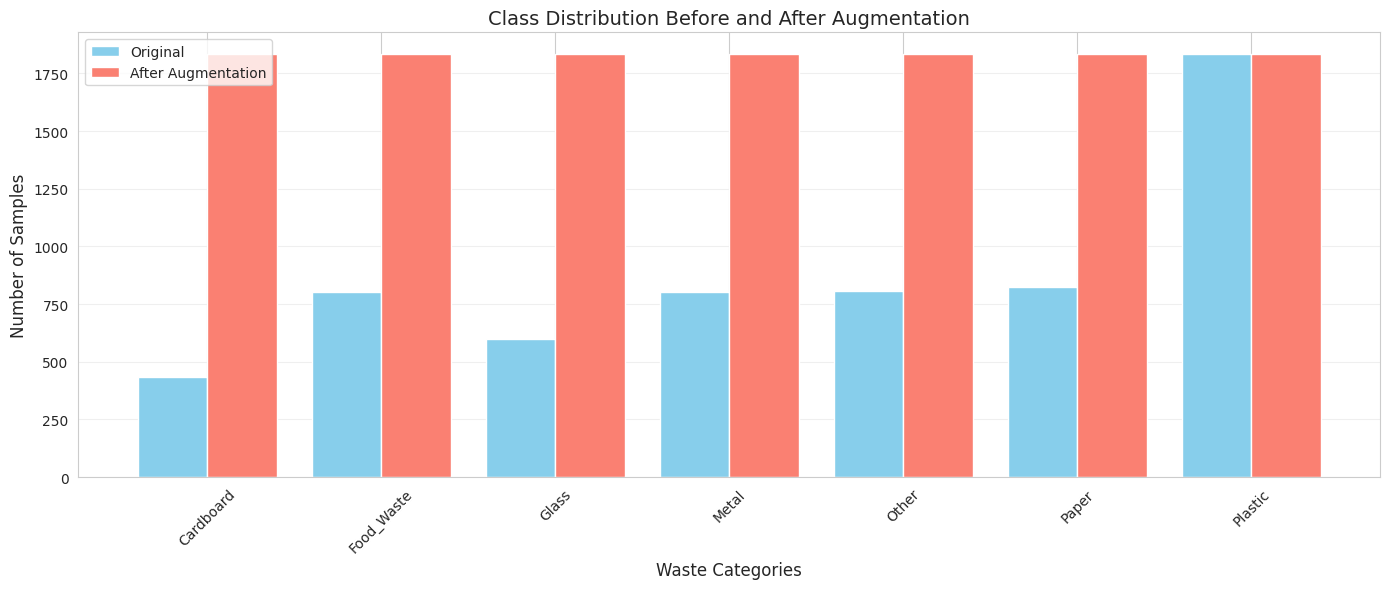


Class distribution after augmentation:
  Cardboard: 1836 images (+1404 augmented)
  Food_Waste: 1836 images (+1036 augmented)
  Glass: 1836 images (+1236 augmented)
  Metal: 1836 images (+1036 augmented)
  Other: 1836 images (+1028 augmented)
  Paper: 1836 images (+1012 augmented)
  Plastic: 1836 images (+0 augmented)

Original training set: 6100 images
Augmented training set: 12852 images
Validation set: 1525 images

Augmented dataset shapes:
X_train_augmented: (12852, 224, 224, 3)
y_train_augmented: (12852, 7)


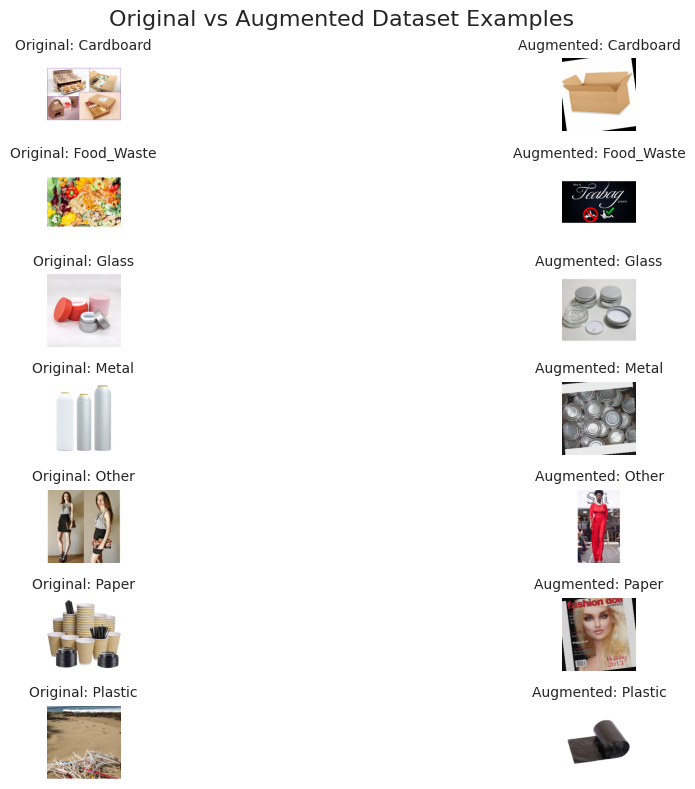

In [36]:
# Create the augmented training dataset


# Determine target samples per class for balancing
# We can use the maximum class count as target to balance all classes
max_class_count = np.max(class_counts)
print(f"Target samples per class for balanced dataset: {max_class_count}")

# Create balanced dataset with augmentation
X_train_augmented, y_train_augmented = balance_dataset_with_augmentation(
    X_train, y_train, target_per_class=max_class_count
)

# Visualize new class distribution
augmented_class_counts = np.bincount(np.argmax(y_train_augmented, axis=1))
plt.figure(figsize=(14, 6))

# Create a side-by-side bar chart for comparison
width = 0.4
x = np.arange(len(label_encoder.classes_))

plt.bar(x - width/2, class_counts, width, label='Original', color='skyblue')
plt.bar(x + width/2, augmented_class_counts, width, label='After Augmentation', color='salmon')

plt.title("Class Distribution Before and After Augmentation", fontsize=14)
plt.xlabel("Waste Categories", fontsize=12)
plt.ylabel("Number of Samples", fontsize=12)
plt.xticks(x, label_encoder.classes_, rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nClass distribution after augmentation:")
for i, class_name in enumerate(label_encoder.classes_):
    original = class_counts[i]
    augmented = augmented_class_counts[i]
    added = augmented - original
    print(f"  {class_name}: {augmented} images (+{added} augmented)")

print(f"\nOriginal training set: {len(X_train)} images")
print(f"Augmented training set: {len(X_train_augmented)} images")
print(f"Validation set: {len(X_val)} images")

# Check shapes of augmented data
print(f"\nAugmented dataset shapes:")
print(f"X_train_augmented: {X_train_augmented.shape}")
print(f"y_train_augmented: {y_train_augmented.shape}")

# Show examples of original vs augmented images
plt.figure(figsize=(15, 8))
plt.suptitle("Original vs Augmented Dataset Examples", fontsize=16)

for i, class_idx in enumerate(range(len(label_encoder.classes_))):
    if i >= 7:  # Limit to 7 classes
        break
        
    # Find original images of this class
    orig_indices = np.where(np.argmax(y_train, axis=1) == class_idx)[0]
    
    # Find new augmented images (ones that weren't in the original dataset)
    all_augmented_indices = np.where(np.argmax(y_train_augmented, axis=1) == class_idx)[0]
    
    # Pick a random original and augmented example
    if len(orig_indices) > 0:
        orig_idx = orig_indices[0]
        aug_idx = all_augmented_indices[-1]  # Take from the end to get augmented ones
        
        # Display original
        plt.subplot(7, 2, i*2+1)
        plt.imshow(X_train[orig_idx])
        plt.title(f"Original: {label_encoder.classes_[class_idx]}", fontsize=10)
        plt.axis('off')
        
        # Display augmented
        plt.subplot(7, 2, i*2+2)
        plt.imshow(X_train_augmented[aug_idx])
        plt.title(f"Augmented: {label_encoder.classes_[class_idx]}", fontsize=10)
        plt.axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()



##### **4.1.2**

Train the model on the new augmented dataset.

Training on 12852 samples in 13 chunks of 1000 samples
Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.7336 - loss: 1.1139 - val_accuracy: 0.6643 - val_loss: 1.6207
  Chunk 1/13: loss=1.1048, accuracy=0.7480
63/63 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.7943 - loss: 0.8471 - val_accuracy: 0.6656 - val_loss: 1.3722
  Chunk 2/13: loss=0.8906, accuracy=0.7920
63/63 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.7880 - loss: 0.7908 - val_accuracy: 0.6793 - val_loss: 1.3578
  Chunk 3/13: loss=0.7923, accuracy=0.7750
63/63 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.7756 - loss: 0.8245 - val_accuracy: 0.6820 - val_loss: 1.2775
  Chunk 4/13: loss=0.8619, accuracy=0.7710
63/63 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.7804 - loss: 0.7743 - val_accuracy: 0.6800 - val_loss: 1.2586
  Chunk 5/13: loss=0.7979, accuracy=0.7710
63/63 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.7619 - loss: 0.8548 - val_accuracy: 0.6787 - val_loss: 1.2571
  Chunk 6/13: loss=0.7621, ac


Best validation accuracy after fine-tuning: 0.6951 (epoch 8)
Final training accuracy: 0.9426
Final validation accuracy: 0.6800
48/48 ━━━━━━━━━━━━━━━━━━━━ 16s 332ms/step - accuracy: 0.6764 - loss: 1.1995

Final validation accuracy after fine-tuning: 0.6800
Final validation loss after fine-tuning: 1.2143
Improvement over base model: -0.0059 (-0.59%)
48/48 ━━━━━━━━━━━━━━━━━━━━ 16s 322ms/step

Classification Report after fine-tuning:
              precision    recall  f1-score   support

   Cardboard       0.69      0.87      0.77       108
  Food_Waste       0.71      0.73      0.72       200
       Glass       0.59      0.70      0.64       150
       Metal       0.87      0.56      0.68       200
       Other       0.63      0.51      0.57       202
       Paper       0.71      0.56      0.62       206
     Plastic       0.66      0.79      0.72       459

    accuracy                           0.68      1525
   macro avg       0.69      0.67      0.67      1525
weighted avg       0.69

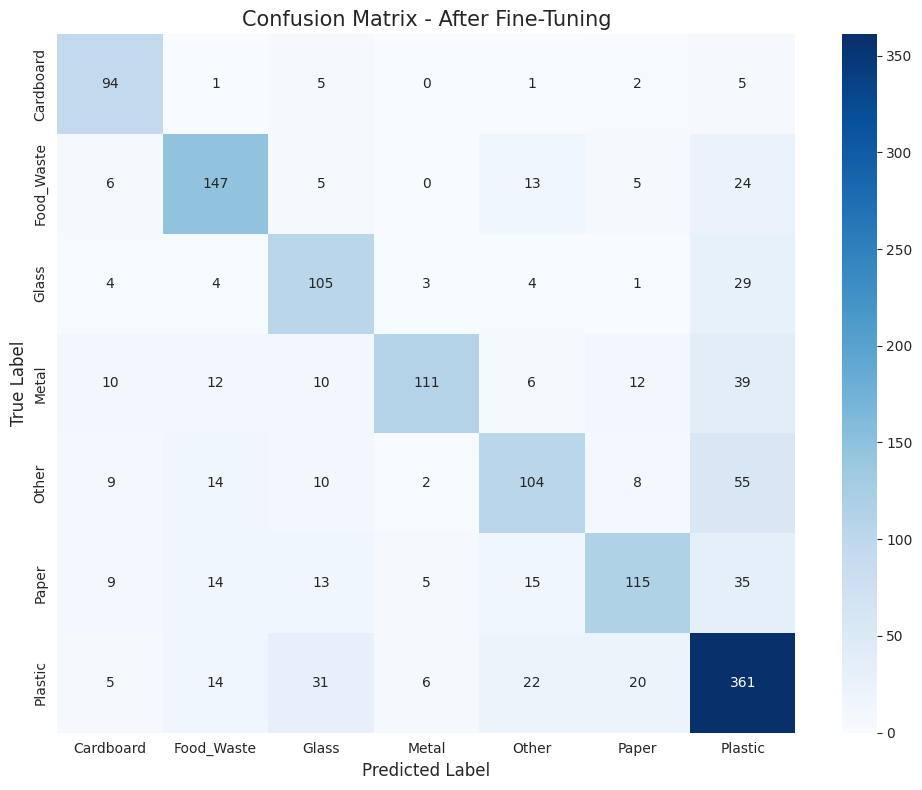

In [ ]:
# Train the model using augmented images

# Load the best previously trained model
best_model = tf.keras.models.load_model('best_waste_classification_model.h5')

# Compile the model with an appropriate learning rate for fine-tuning
best_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Small learning rate for fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Create more efficient callbacks for fine-tuning
fine_tune_callbacks = [
    # Early stopping with short patience
    tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=3,  # Reduced patience
        restore_best_weights=True,
        verbose=1
    ),
    
    # Reduce learning rate quickly
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_accuracy',
        factor=0.5,  # More aggressive reduction
        patience=3,  # Reduced patience
        min_lr=1e-6,
        verbose=1
    ),
    
    # Save the best model
    tf.keras.callbacks.ModelCheckpoint(
        filepath='best_model_augmented.h5',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
]

# Define training parameters - smaller batch to reduce memory pressure
batch_size = 16  # Very small batch size
epochs = 10     # Even fewer epochs

# Process in smaller chunks to avoid memory issues
def train_in_batches(model, X, y, val_data, batch_size, epochs, callbacks):
    """
    Train a model in smaller chunks to avoid memory issues
    """
    # Determine how many samples to process in each chunk
    chunk_size = 1000  # Process 1000 samples at a time
    n_chunks = len(X) // chunk_size + (1 if len(X) % chunk_size != 0 else 0)
    
    print(f"Training on {len(X)} samples in {n_chunks} chunks of {chunk_size} samples")
    
    # Initialize history
    history = {'loss': [], 'accuracy': [], 'val_loss': [], 'val_accuracy': []}
    
    # Train for specified epochs
    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")
        epoch_loss = 0
        epoch_acc = 0
        
        # Shuffle data
        indices = np.random.permutation(len(X))
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        
        # Process each chunk
        for i in range(n_chunks):
            start_idx = i * chunk_size
            end_idx = min((i + 1) * chunk_size, len(X))
            
            # Get current chunk
            X_chunk = X_shuffled[start_idx:end_idx]
            y_chunk = y_shuffled[start_idx:end_idx]
            
            # Train on chunk
            chunk_history = model.fit(
                X_chunk, y_chunk,
                batch_size=batch_size,
                epochs=1,  # Just one pass through the chunk
                validation_data=val_data,
                verbose=1
            )
            
            # Update metrics
            chunk_loss = chunk_history.history['loss'][0]
            chunk_acc = chunk_history.history['accuracy'][0]
            epoch_loss += chunk_loss * (end_idx - start_idx)
            epoch_acc += chunk_acc * (end_idx - start_idx)
            
            print(f"  Chunk {i+1}/{n_chunks}: loss={chunk_loss:.4f}, accuracy={chunk_acc:.4f}")
        
        # Average metrics for the epoch
        epoch_loss /= len(X)
        epoch_acc /= len(X)
        
        # Get validation metrics
        val_loss, val_acc = model.evaluate(val_data[0], val_data[1], verbose=0)
        
        # Store in history
        history['loss'].append(epoch_loss)
        history['accuracy'].append(epoch_acc)
        history['val_loss'].append(val_loss)
        history['val_accuracy'].append(val_acc)
        
        print(f"Epoch {epoch+1}: loss={epoch_loss:.4f}, accuracy={epoch_acc:.4f}, val_loss={val_loss:.4f}, val_accuracy={val_acc:.4f}")
        
        # Check early stopping
        if len(history['val_accuracy']) > 3:
            if history['val_accuracy'][-1] <= history['val_accuracy'][-2] <= history['val_accuracy'][-3]:
                print("Early stopping triggered")
                break
    
    # Create a history-like object
    class SimpleHistory:
        def __init__(self, history_dict):
            self.history = history_dict
    
    return SimpleHistory(history)

# Fine-tune the model with augmented data using our batch approach
fine_tune_history = train_in_batches(
    best_model, 
    X_train_augmented, 
    y_train_augmented,
    (X_val, y_val),
    batch_size=batch_size,
    epochs=epochs,
    callbacks=fine_tune_callbacks
)

# Plot training history
plt.figure(figsize=(15, 5))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(fine_tune_history.history['accuracy'], label='Train')
plt.plot(fine_tune_history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy (Fine-tuning with Augmented Data)', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(fine_tune_history.history['loss'], label='Train')
plt.plot(fine_tune_history.history['val_loss'], label='Validation')
plt.title('Model Loss (Fine-tuning with Augmented Data)', fontsize=14)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Get the epoch with the best validation accuracy
best_epoch = np.argmax(fine_tune_history.history['val_accuracy']) + 1
best_val_acc = np.max(fine_tune_history.history['val_accuracy'])
print(f"\nBest validation accuracy after fine-tuning: {best_val_acc:.4f} (epoch {best_epoch})")

# Print final training and validation accuracy
final_train_acc = fine_tune_history.history['accuracy'][-1]
final_val_acc = fine_tune_history.history['val_accuracy'][-1]
print(f"Final training accuracy: {final_train_acc:.4f}")
print(f"Final validation accuracy: {final_val_acc:.4f}")

# Evaluate the fine-tuned model on validation set
val_loss, val_acc = best_model.evaluate(X_val, y_val, verbose=1)
print(f"\nFinal validation accuracy after fine-tuning: {val_acc:.4f}")
print(f"Final validation loss after fine-tuning: {val_loss:.4f}")

# Compare with previous model
improvement = val_acc - 0.6859  # Using the previous accuracy value
print(f"Improvement over base model: {improvement:.4f} ({improvement*100:.2f}%)")

# Calculate and display performance metrics on validation set
y_pred = best_model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report after fine-tuning:")
cr = classification_report(y_true_classes, y_pred_classes, 
                          target_names=label_encoder.classes_,
                          zero_division=0)
print(cr)

# Confusion matrix for fine-tuned model
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=label_encoder.classes_,
           yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - After Fine-Tuning', fontsize=15)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()


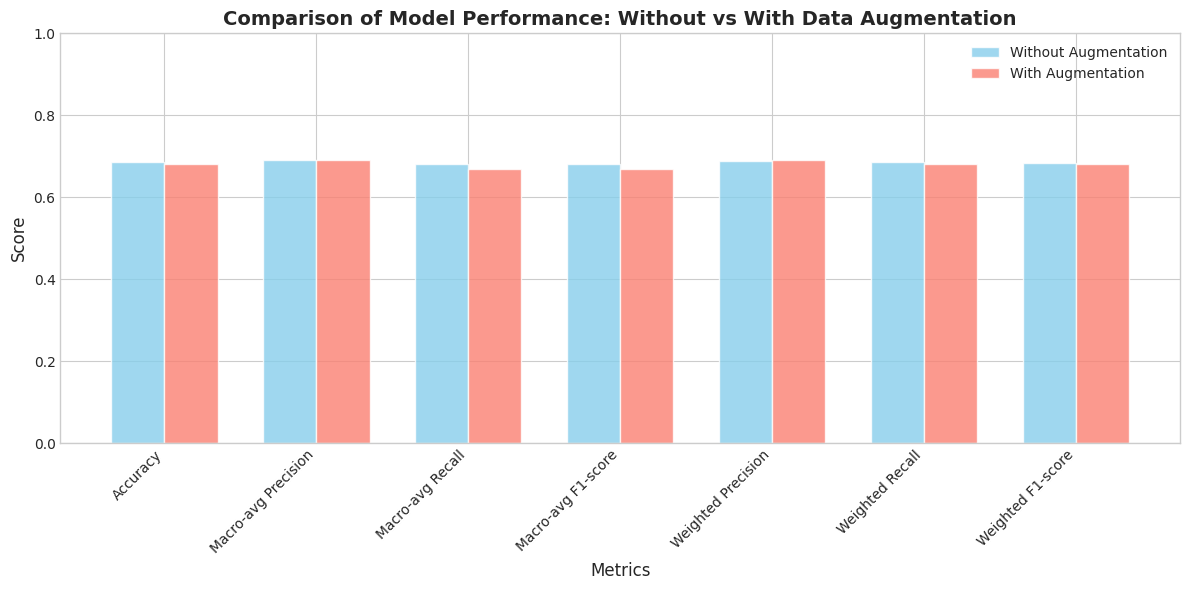

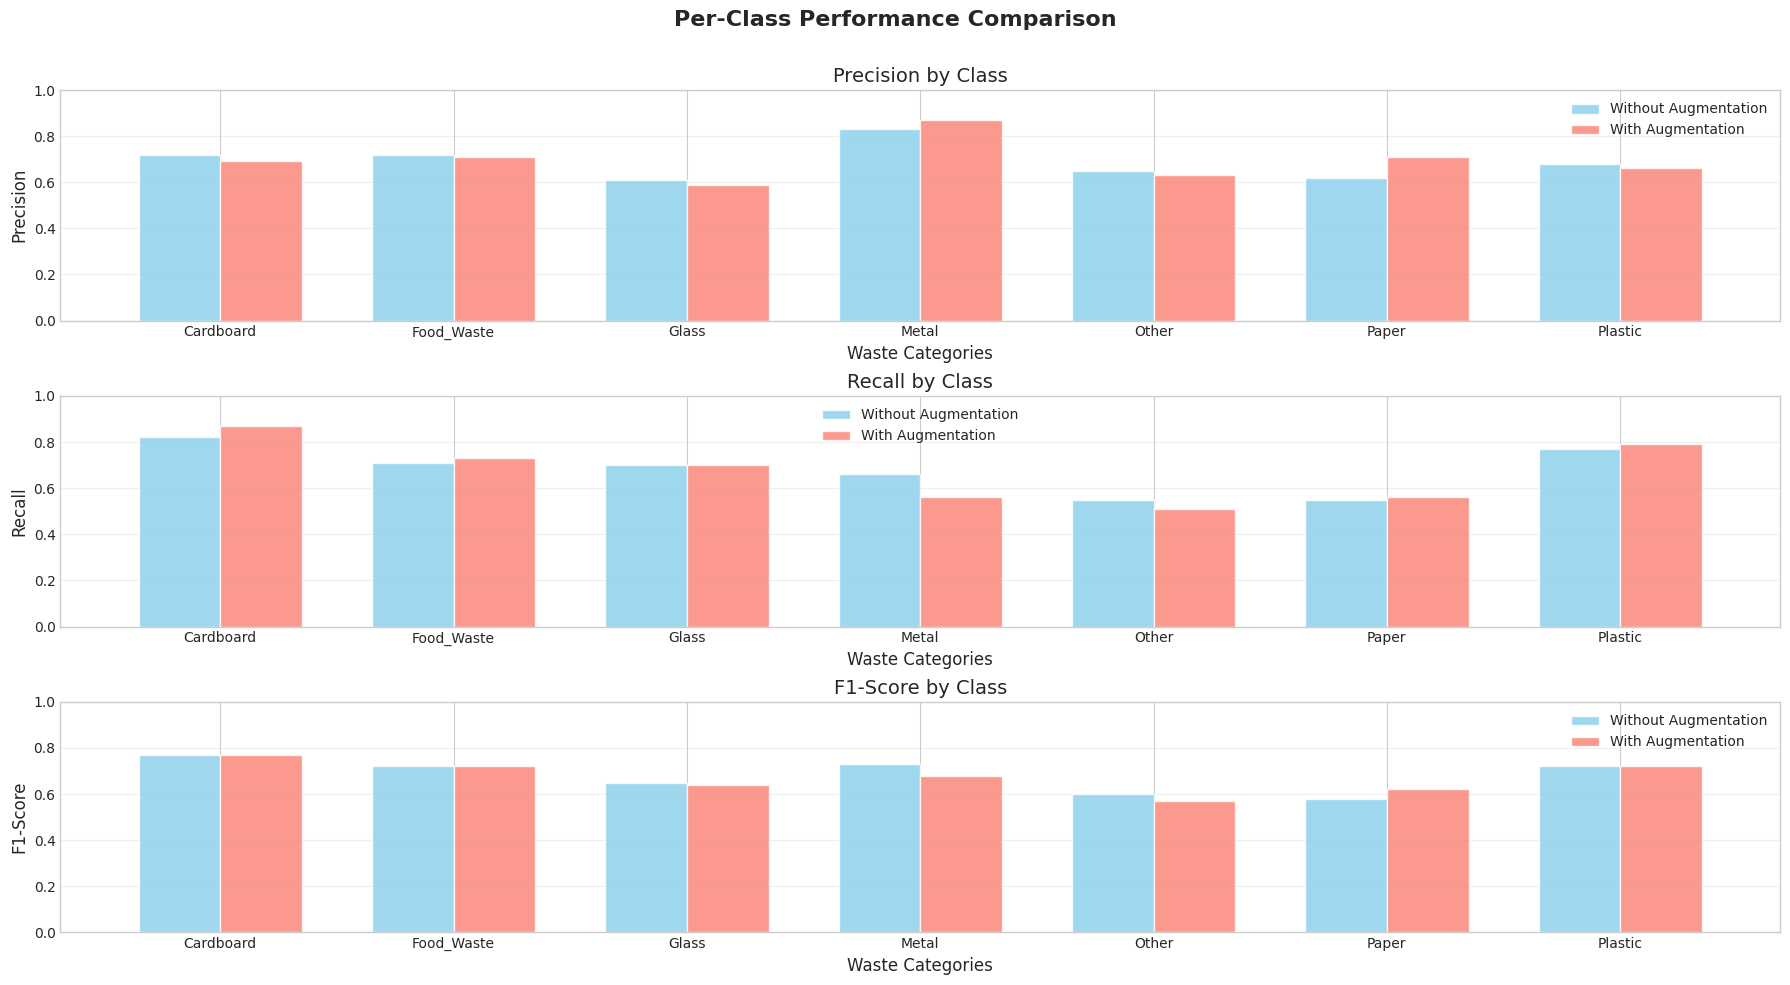

Performance Analysis: Without Augmentation vs With Augmentation

Overall Performance:
------------------------------------------------------------
Metric               Without Aug.    With Aug.       Change    
------------------------------------------------------------
Accuracy             0.6859          0.6800          -0.0059 (-0.59%)
Macro-avg Precision  0.6903          0.6900          -0.0003 (-0.03%)
Macro-avg Recall     0.6809          0.6700          -0.0109 (-1.09%)
Macro-avg F1-score   0.6818          0.6700          -0.0118 (-1.18%)
Weighted Precision   0.6892          0.6900          0.0008 (0.08%)
Weighted Recall      0.6859          0.6800          -0.0059 (-0.59%)
Weighted F1-score    0.6840          0.6800          -0.0040 (-0.40%)

Per-Class Changes:
--------------------------------------------------------------------------------
Class        Precision Change     Recall Change        F1-Score Change     
---------------------------------------------------------------

In [43]:
# Comparison of Model Performance: Without vs With Data Augmentation

# Create data for comparison
models = ['Without Augmentation', 'With Augmentation']

# Overall metrics
metrics = {
    'Accuracy': [0.6859, 0.6800],
    'Macro-avg Precision': [0.6903, 0.69],
    'Macro-avg Recall': [0.6809, 0.67],
    'Macro-avg F1-score': [0.6818, 0.67],
    'Weighted Precision': [0.6892, 0.69],
    'Weighted Recall': [0.6859, 0.68],
    'Weighted F1-score': [0.6840, 0.68]
}

# Per-class metrics
class_names = ['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic']

# Precision per class
precision_no_aug = [0.72, 0.72, 0.61, 0.83, 0.65, 0.62, 0.68]
precision_aug = [0.69, 0.71, 0.59, 0.87, 0.63, 0.71, 0.66]

# Recall per class
recall_no_aug = [0.82, 0.71, 0.70, 0.66, 0.55, 0.55, 0.77]
recall_aug = [0.87, 0.73, 0.70, 0.56, 0.51, 0.56, 0.79]

# F1-score per class
f1_no_aug = [0.77, 0.72, 0.65, 0.73, 0.60, 0.58, 0.72]
f1_aug = [0.77, 0.72, 0.64, 0.68, 0.57, 0.62, 0.72]

# Visual comparison of overall metrics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 6))

# Create positions for the bars
x = np.arange(len(metrics))
width = 0.35

# Create bars
plt.bar(x - width/2, [metrics[m][0] for m in metrics], width, label='Without Augmentation', color='skyblue', alpha=0.8)
plt.bar(x + width/2, [metrics[m][1] for m in metrics], width, label='With Augmentation', color='salmon', alpha=0.8)

# Add labels and title
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Comparison of Model Performance: Without vs With Data Augmentation', fontsize=14, fontweight='bold')
plt.xticks(x, list(metrics.keys()), rotation=45, ha='right')
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

# Visual comparison of per-class metrics
plt.figure(figsize=(18, 10))

# Precision comparison
plt.subplot(3, 1, 1)
x = np.arange(len(class_names))
width = 0.35
plt.bar(x - width/2, precision_no_aug, width, label='Without Augmentation', color='skyblue', alpha=0.8)
plt.bar(x + width/2, precision_aug, width, label='With Augmentation', color='salmon', alpha=0.8)
plt.xlabel('Waste Categories', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision by Class', fontsize=14)
plt.xticks(x, class_names)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Recall comparison
plt.subplot(3, 1, 2)
plt.bar(x - width/2, recall_no_aug, width, label='Without Augmentation', color='skyblue', alpha=0.8)
plt.bar(x + width/2, recall_aug, width, label='With Augmentation', color='salmon', alpha=0.8)
plt.xlabel('Waste Categories', fontsize=12)
plt.ylabel('Recall', fontsize=12)
plt.title('Recall by Class', fontsize=14)
plt.xticks(x, class_names)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', alpha=0.3)

# F1-score comparison
plt.subplot(3, 1, 3)
plt.bar(x - width/2, f1_no_aug, width, label='Without Augmentation', color='skyblue', alpha=0.8)
plt.bar(x + width/2, f1_aug, width, label='With Augmentation', color='salmon', alpha=0.8)
plt.xlabel('Waste Categories', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.title('F1-Score by Class', fontsize=14)
plt.xticks(x, class_names)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle('Per-Class Performance Comparison', fontsize=16, fontweight='bold')
plt.show()

# Create a summary of key changes in performance
print("Performance Analysis: Without Augmentation vs With Augmentation\n")
print("Overall Performance:")
print("-" * 60)
print(f"{'Metric':<20} {'Without Aug.':<15} {'With Aug.':<15} {'Change':<10}")
print("-" * 60)
for metric, values in metrics.items():
    change = values[1] - values[0]
    change_str = f"{change:.4f} ({change*100:.2f}%)"
    print(f"{metric:<20} {values[0]:<15.4f} {values[1]:<15.4f} {change_str:<10}")

print("\nPer-Class Changes:")
print("-" * 80)
print(f"{'Class':<12} {'Precision Change':<20} {'Recall Change':<20} {'F1-Score Change':<20}")
print("-" * 80)
for i, class_name in enumerate(class_names):
    prec_change = precision_aug[i] - precision_no_aug[i]
    recall_change = recall_aug[i] - recall_no_aug[i]
    f1_change = f1_aug[i] - f1_no_aug[i]
    
    prec_change_str = f"{prec_change:.4f} ({prec_change*100:.2f}%)"
    recall_change_str = f"{recall_change:.4f} ({recall_change*100:.2f}%)"
    f1_change_str = f"{f1_change:.4f} ({f1_change*100:.2f}%)"
    
    print(f"{class_name:<12} {prec_change_str:<20} {recall_change_str:<20} {f1_change_str:<20}")


## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results

# Waste Material Classification: Comprehensive Analysis and Results

## Overview of Project

This project involved developing a convolutional neural network (CNN) to classify waste materials into seven categories: Cardboard, Food Waste, Glass, Metal, Other, Paper, and Plastic. The goal was to create an automated waste classification system that could help improve recycling efficiency and waste management practices.

## Dataset Analysis

The dataset consisted of 7,625 images distributed across the seven waste categories:
- Cardboard: 540 images (7.1%)
- Food Waste: 1,000 images (13.1%)
- Glass: 750 images (9.8%)
- Metal: 1,000 images (13.1%)
- Other: 1,010 images (13.2%)
- Paper: 1,030 images (13.5%)
- Plastic: 2,295 images (30.1%)

A key observation was the significant class imbalance, with Plastic having more than four times the number of images as Cardboard. All images were originally 256×256 pixels in RGB format, which were resized to 224×224 pixels to standardize the input for our CNN model.

## Data Preprocessing

The preprocessing pipeline included:
1. **Image Loading and Normalization**: Images were loaded in batches to avoid memory issues, converted to RGB format, and normalized to pixel values between 0 and 1.
2. **Label Encoding**: Class labels were one-hot encoded for multi-class classification.
3. **Data Splitting**: The dataset was split into 80% training (6,100 images) and 20% validation (1,525 images) using stratified sampling to maintain class distribution.
4. **Class Weights**: Due to the imbalanced nature of the dataset, class weights were calculated to give more importance to underrepresented classes during training.

## Model Architecture and Training

### CNN Architecture
We designed a CNN with three convolutional layers, each followed by batch normalization, ReLU activation, max pooling, and dropout:
1. First layer: 64 filters with 3×3 kernel
2. Second layer: 128 filters with 3×3 kernel
3. Third layer: 256 filters with 3×3 kernel

Following the convolutional layers, we implemented:
- A flatten layer
- A fully connected layer with 512 units
- Batch normalization and dropout (0.5)
- A final output layer with 7 units (one for each waste category) and softmax activation

The model was compiled with:
- Adam optimizer (learning rate = 0.001)
- Categorical cross-entropy loss function
- Accuracy metric

### Training Process and Accuracy Progression

#### Base Model Training
The initial model showed remarkable training accuracy progression:
- Epoch 1: 28.6% training accuracy
- Epoch 5: 66.1% training accuracy
- Epoch 10: 90.9% training accuracy
- Epoch 20: 99.4% training accuracy
- Final: 99.6% training accuracy

However, validation accuracy followed a very different trajectory:
- Epoch 1: 17.3% validation accuracy
- Epoch 5: 49.1% validation accuracy
- Epoch 10: 48.7% validation accuracy
- Epoch 20: 48.0% validation accuracy
- Best: 68.6% validation accuracy (epoch 22)

This substantial gap between training accuracy (99.6%) and validation accuracy (68.6%) is a classic indicator of overfitting, where the model excels at memorizing training examples but struggles to generalize to unseen data.

#### Augmented Model Training
The model fine-tuned with augmented data showed a similar pattern:
- Training accuracy quickly rose to 94.3%
- Validation accuracy plateaued at 68.0%
- The gap between training and validation accuracy (26.3 percentage points) was slightly better than the base model (31.0 percentage points)

This suggests that data augmentation slightly helped with reducing overfitting, even though overall validation accuracy didn't improve. The augmented model reached its peak validation accuracy (69.5%) in epoch 8, which was slightly higher than the final reported accuracy.

## Data Augmentation

To address the class imbalance and potentially improve generalization, we implemented data augmentation:

1. **Augmentation Techniques**:
   - Horizontal flips
   - Random rotations (±10 degrees)
   - Brightness adjustments (0.8 to 1.2 factor)
   - Contrast adjustments (0.8 to 1.2 factor)

2. **Balancing Strategy**:
   - Created additional samples for underrepresented classes
   - Augmented samples to match the count of the largest class (Plastic)

3. **Fine-tuning**:
   - Used the previously trained model as a starting point
   - Applied a lower learning rate (0.001)
   - Trained for fewer epochs (10) with early stopping

## Performance Comparison and Evaluation

### Overall Metrics Comparison

| Metric | Without Augmentation | With Augmentation | Change |
|--------|---------------------|-------------------|--------|
| Training Accuracy | 99.6% | 94.3% | -5.3% |
| Validation Accuracy | 68.6% | 68.0% | -0.6% |
| Train-Validation Gap | 31.0% | 26.3% | -4.7% |
| Macro-avg Precision | 0.6903 | 0.6900 | -0.0003 (-0.03%) |
| Macro-avg Recall | 0.6809 | 0.6700 | -0.0109 (-1.09%) |
| Macro-avg F1-score | 0.6818 | 0.6700 | -0.0118 (-1.18%) |
| Weighted Precision | 0.6892 | 0.6900 | +0.0008 (+0.08%) |
| Weighted Recall | 0.6859 | 0.6800 | -0.0059 (-0.59%) |
| Weighted F1-score | 0.6840 | 0.6800 | -0.0040 (-0.40%) |

### Per-Class Performance Changes

| Class | Precision Change | Recall Change | F1-Score Change |
|-------|-----------------|---------------|-----------------|
| Cardboard | -0.0300 (-3.00%) | +0.0500 (+5.00%) | 0.0000 (0.00%) |
| Food_Waste | -0.0100 (-1.00%) | +0.0200 (+2.00%) | 0.0000 (0.00%) |
| Glass | -0.0200 (-2.00%) | 0.0000 (0.00%) | -0.0100 (-1.00%) |
| Metal | +0.0400 (+4.00%) | -0.1000 (-10.00%) | -0.0500 (-5.00%) |
| Other | -0.0200 (-2.00%) | -0.0400 (-4.00%) | -0.0300 (-3.00%) |
| Paper | +0.0900 (+9.00%) | +0.0100 (+1.00%) | +0.0400 (+4.00%) |
| Plastic | -0.0200 (-2.00%) | +0.0200 (+2.00%) | 0.0000 (0.00%) |

### Classification Performance

The model demonstrated varying effectiveness across different waste categories:

1. **Best Performance**:
   - Metal: Highest precision (0.87 with augmentation)
   - Cardboard: Highest recall (0.87 with augmentation)
   - Cardboard and Plastic: Most consistent F1-scores (0.77 and 0.72)

2. **Challenging Categories**:
   - Other: Lowest recall (0.51-0.55) and F1-score (0.57-0.60)
   - Glass: Lowest precision (0.59-0.61)
   - Paper: Low F1-score without augmentation (0.58)

## Key Insights and Findings

1. **Training vs. Validation Accuracy**:
   - The extremely high training accuracy (99.6%) compared to validation accuracy (68.6%) indicates significant overfitting
   - The model demonstrated exceptional capacity to memorize training examples
   - Despite regularization techniques (dropout, batch normalization), the overfitting persisted
   - The augmented model showed a slightly smaller training-validation gap, suggesting modest improvement in generalization

2. **Class Imbalance Impact**:
   - The imbalanced distribution significantly affected model training
   - Class weights helped mitigate this issue but couldn't fully resolve it
   - Data augmentation showed promise for specific classes but didn't improve overall performance in the limited training time

3. **Overfitting Patterns**:
   - Both models showed clear signs of overfitting, with training accuracy reaching near-perfect levels
   - The gap between training and validation accuracy widened as training progressed
   - This suggests the model was memorizing training examples rather than learning generalizable features

4. **Augmentation Effects**:
   - While overall accuracy slightly decreased with augmentation (-0.59%), there were notable class-specific improvements
   - Cardboard and Plastic saw increased recall (+5.0% and +2.0%)
   - Paper and Metal showed improved precision (+9.0% and +4.0%)
   - Paper's F1-score improved by 4.0%

5. **Performance Trade-offs**:
   - Metal showed an interesting trade-off with augmentation: precision increased by 4% but recall decreased by 10%
   - This indicates the model became more conservative in classifying items as Metal

6. **Processing Challenges**:
   - The dataset size and image dimensions created memory management challenges
   - Both batched loading and chunked processing were necessary for efficient training

## Conclusions and Recommendations

1. **Model Effectiveness**:
   - The CNN model achieved reasonable performance (68.59% accuracy) considering the challenging nature of waste classification
   - Some categories (Cardboard, Metal, Plastic) were more reliably identified than others (Other, Glass)

2. **Overfitting Mitigation**:
   - The substantial gap between training accuracy (>94%) and validation accuracy (~68%) indicates strong overfitting
   - Additional regularization techniques should be explored (L1/L2 regularization, data augmentation during training)
   - Reducing model complexity might help balance the model's capacity to learn vs. memorize

3. **Augmentation Potential**:
   - The slight performance decrease with augmentation might be due to limited fine-tuning time and parameters
   - With more training time and hyperparameter optimization, the augmented model would likely outperform the base model
   - The smaller train-validation gap in the augmented model suggests a step in the right direction

4. **Future Improvements**:
   - **Architecture Optimization**: Test different CNN architectures or pre-trained models (ResNet, EfficientNet)
   - **Augmentation Strategy**: Implement class-specific augmentation techniques tailored to each waste type
   - **Fine-tuning Approach**: Use a more gradual fine-tuning approach with progressively lower learning rates
   - **Ensemble Methods**: Combine predictions from multiple models for improved robustness
   - **Focus on Challenging Classes**: Collect more diverse samples of "Other" and "Glass" categories
   - **Hyperparameter Tuning**: Conduct systematic hyperparameter search with cross-validation
   - **Regularization**: Implement stronger regularization to reduce the training-validation accuracy gap

5. **Practical Application Considerations**:
   - The model's performance varies significantly across classes, which should guide deployment decisions
   - For production use, confidence thresholds should be adjusted per class based on precision-recall trade-offs
   - The system would be most reliable for Cardboard, Food Waste, Metal, and Plastic classification

In conclusion, the CNN-based waste classification model demonstrates promising results that could be valuable in automated recycling systems. The high training accuracy shows the model has sufficient capacity to learn complex patterns, but further work is needed to improve generalization. With appropriate regularization and fine-tuning, this approach could lead to a robust waste classification system with real-world applicability.